# NYC Yellow Taxi

## Paso 0: Problema de negocio

### Paso 0.1 Contexto



La Comisión de Taxis y Limusinas de la Ciudad de Nueva York (NYC Taxi & Limousine Commission, TLC) recopila y administra datos de todos sus vehículos de transporte público, los cuales están disponibles gratuitamente para descarga desde su sitio web oficial. Puedes acceder a ellos [aquí](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

El TLC gestiona datos principalmente para cuatro tipos diferentes de vehículos:

- **Taxi amarillo (Yellow Taxi):**
  Son los famosos taxis amarillos de NYC que ofrecen servicio exclusivamente mediante paradas en la calle (street hails). El número de taxis amarillos está limitado por una cantidad finita de medallones otorgados por el TLC. Los pasajeros acceden a este servicio deteniendo el taxi en la calle; los viajes no son pre-arreglados.

- **Taxi verde (Green Taxi):**
  Vehículos con licencia para operar en zonas específicas (los boroughs) con marca verde. Estos taxis pueden aceptar viajes tanto pre-arreglados como paradas en la calle (street hails).

- **Vehículos de alquiler (For-Hire Vehicles, FHVs):**
  Estos vehículos deben ser solicitados con anticipación a través de un despachador o compañía de limusinas. No pueden recoger pasajeros mediante paradas en la calle, ya que sus viajes deben ser pre-arreglados.

He creado un Kernel especial para este conjunto de datos que utiliza técnicas de Clustering, Regresión y Series Temporales, que puedes consultar [aquí](#).

## Puntos importantes sobre este dataset

- En este análisis se considera únicamente la información de los **taxis amarillos** para los meses de enero de 2015 y enero a marzo de 2016.
- En el sitio web del TLC encontrarás formatos de archivo CSV distintos, pues el TLC actualiza periódicamente los datos y agrega nueva información.
- Una de las modificaciones más importantes es que, en versiones recientes, en lugar de proporcionar las coordenadas exactas de recogida y entrega, los datos están organizados en regiones numeradas de la ciudad, lo que cambia la forma en que se interpretan las ubicaciones.
- Por esta razón, el dataset usado en este proyecto está basado en una versión anterior de los CSV, que permite trabajar con coordenadas geográficas exactas.
- Este dataset es útil para practicar técnicas de clustering y análisis de series temporales.
- Si prefieres trabajar solo con datos actualizados sin clustering, puedes descargar directamente los nuevos archivos CSV desde la página oficial del TLC.


### Paso 0.2: Problema

El objetivo de este proyecto es desarrollar un modelo predictivo que permita estimar el total_amount cobrado en cada viaje de taxi en la ciudad de Nueva York, utilizando variables disponibles como la distancia del viaje, duración, cantidad de pasajeros, tipo de pago, y otros cargos adicionales. Este modelo podrá ayudar a las compañías de transporte y plataformas de análisis a anticipar ingresos, detectar anomalías en las tarifas y optimizar la asignación de recursos. Además, al identificar los factores que más influyen en el costo total del viaje, se facilitarán estrategias para mejorar la experiencia del pasajero y la eficiencia operativa del servicio.

### Paso 0.3: Objetivos

#### Objetivo General
Desarrollar un modelo de machine learning que permita predecir con precisión el **total_amount** cobrado en viajes de taxi en la ciudad de Nueva York, utilizando variables relevantes del dataset histórico.

#### Objetivos Específicos
- Analizar y limpiar el conjunto de datos para asegurar la calidad y consistencia de la información.
- Explorar la relación entre el monto total del viaje y variables como la distancia, tiempo de viaje, cantidad de pasajeros y tipo de pago.
- Seleccionar y transformar las variables más relevantes para mejorar el desempeño del modelo predictivo.
- Entrenar y evaluar distintos algoritmos de machine learning (regresión lineal, árboles de decisión, Random Forest, etc.) para identificar el mejor modelo.
- Validar el modelo seleccionado mediante técnicas de validación cruzada y métricas de error (MAE, RMSE).
- Interpretar los resultados para entender los factores que más afectan el monto total cobrado en un viaje.


### Paso 0.4: Diccionario de datos

| Campo               | Descripción                                                                                                                      |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------|
| **VendorID**         | Código que indica el proveedor TPEP que proporcionó el registro. Ejemplos: Creative Mobile Technologies, VeriFone Inc.           |
| **tpep_pickup_datetime** | Fecha y hora en que se activó el taxímetro (inicio del viaje).                                                                 |
| **tpep_dropoff_datetime** | Fecha y hora en que se desactivó el taxímetro (fin del viaje).                                                                 |
| **Passenger_count**  | Número de pasajeros en el vehículo. Valor ingresado por el conductor.                                                            |
| **Trip_distance**    | Distancia recorrida durante el viaje en millas, reportada por el taxímetro.                                                      |
| **Pickup_longitude** | Longitud del lugar donde se activó el taxímetro.                                                                                  |
| **Pickup_latitude**  | Latitud del lugar donde se activó el taxímetro.                                                                                   |
| **RateCodeID**       | Código de tarifa final aplicado al final del viaje. Puede ser tarifa estándar, JFK, Newark, Nassau o Westchester, tarifa negociada o viaje en grupo. |
| **Store_and_fwd_flag** | Indicador que señala si el registro del viaje se almacenó en la memoria del vehículo antes de enviarlo al proveedor (almacenamiento y reenvío). Y = sí, N = no. |
| **Dropoff_longitude** | Longitud del lugar donde se desactivó el taxímetro.                                                                              |
| **Dropoff_latitude** | Latitud del lugar donde se desactivó el taxímetro.                                                                               |
| **Payment_type**     | Código numérico que indica cómo pagó el pasajero el viaje. Ejemplos: tarjeta de crédito, efectivo, sin cargo, disputa, desconocido, viaje anulado. |
| **Fare_amount**      | Tarifa calculada por tiempo y distancia según el taxímetro.                                                                      |
| **Extra**            | Cargos extras y recargos varios. Actualmente incluye cargos de $0.50 y $1 por horas pico y nocturnos.                            |
| **MTA_tax**          | Impuesto MTA de $0.50 aplicado automáticamente según la tarifa metered.                                                          |
| **Improvement_surcharge** | Recargo de $0.30 aplicado en el inicio del viaje desde 2015 para mejoras.                                                     |
| **Tip_amount**       | Monto de la propina. Automáticamente registrado para propinas con tarjeta de crédito. Propinas en efectivo no incluidas.          |
| **Tolls_amount**     | Monto total pagado en peajes durante el viaje.                                                                                   |
| **Total_amount**     | Monto total cobrado al pasajero. No incluye propinas en efectivo.                                                                |


## Paso 1: Importar librerías

In [431]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import shutil
import os



from utils.cleaning_data import remove_outliers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, TweedieRegressor, GammaRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from matplotlib.ticker import FuncFormatter

## Paso 2: Cargar los datos

In [432]:
# Define the target directory and the expected dataset files
target_dir = os.path.abspath(os.path.join(os.getcwd(), "../data"))
expected_files = ["yellow_tripdata_2015-01.csv", "yellow_tripdata_2016-01.csv", "yellow_tripdata_2016-02.csv", "yellow_tripdata_2016-03.csv"]  # Replace with actual dataset filenames

# Check if the files already exist in the target directory
if all(os.path.exists(os.path.join(target_dir, file)) for file in expected_files):
    print("Files already exist in the target directory. Skipping download.")
else:
    # Download the dataset
    path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")
    print("Path to dataset files:", path)

    # Create the 'data' folder if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Move all files from download path to target_dir, checking if the file already exists
    for file_name in os.listdir(path):
        src = os.path.join(path, file_name)
        dst = os.path.join(target_dir, file_name)

        # Check if the file already exists in the target directory
        if not os.path.exists(dst):
            shutil.move(src, dst)
            print(f"Moved: {file_name}")
        else:
            print(f"File already exists: {file_name}")

print("Files moved to:", target_dir)

Files already exist in the target directory. Skipping download.
Files moved to: C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\data


In [433]:
df = pd.read_csv(f"../data/yellow_tripdata_2016-03.csv")

In [434]:
df.shape

(12210952, 19)

In [435]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1                  N         -74.005943         40.733166             1   
2                  N         -73.974541         40.675770             1   
3                  N         -73.969650         40.757767             1   
4                  N         -74.177170         40.695053             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.5      0.5        2.05          0.00   
1         11.0    0.5      0.5        3.05          0.00   
2         54.5    0.5      0.5        8.00          0.00   
3         31.5    0.0      0.5        3.78          5.54   
4         98.0    0.0      0.0        0.00         15.50   

   improvement_surcharge  total_amount  
0                    0.3         12.35  
1                    0.3         15.35  
2                    0.3         63.80  
3                    0.3         41.62  
4                    0.3        113.80

In [436]:
df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
12210947         1  2016-03-31 16:34:36   2016-03-31 16:34:36   
12210948         1  2016-03-26 03:02:32   2016-06-14 18:47:55   
12210949         1  2016-03-20 08:43:59   2016-06-27 15:05:01   
12210950         1  2016-03-20 08:49:47   2016-06-28 19:11:27   
12210951         1  2016-03-20 08:50:24   2016-06-29 15:58:16   

          passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
12210947                1            0.0          0.000000         0.000000   
12210948                1            0.4        -73.977356        40.774471   
12210949                1           20.2          0.000000         0.000000   
12210950                1           15.4        -73.790077        40.647377   
12210951                1           17.5        -73.798485        40.645096   

          RatecodeID store_and_fwd_flag  dropoff_longitude  dropoff_latitude  \
12210947           1                  Y           0.000000          0.000000   
12210948           1                  N         -73.982536         40.772408   
12210949           2                  N         -74.008614         40.710987   
12210950           1                  N         -73.971756         40.578457   
12210951           2                  N         -73.993111         40.725880   

          payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
12210947             2         19.0    1.0      0.5         0.0          0.00   
12210948             1          4.0    1.0      0.5         1.7          0.00   
12210949             1         52.0    0.0      0.5         6.0          5.54   
12210950             1         42.5    1.0      0.5         5.0          0.00   
12210951             1         52.0    0.0      0.5        13.2          0.00   

          improvement_surcharge  total_amount  
12210947                    0.3         20.80  
12210948                    0.3          7.50  
12210949                    0.3         64.34  
12210950                    0.3         49.30  
12210951                    0.3         66.00

## Paso 3: Análisis de datos

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [438]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [439]:
# Select specific numerical columns
selected_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tip_amount', 'total_amount']
numerical_columns = [col for col in selected_columns if col in df.columns]

# Compute summary statistics
statistics = df[numerical_columns].agg(
    ['mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurt']
).T.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "std": "Standard Deviation",
    "var": "Variance",
    "min": "Minimum",
    "max": "Maximum",
    "skew": "Skewness",
    "kurt": "Kurtosis"
})

# Display results
print("\nMedidas de tendencia central y dispersión:\n")
statistics


Medidas de tendencia central y dispersión:



Mean  Median  Standard Deviation      Variance  Minimum  \
passenger_count   1.659580    1.00            1.312189  1.721841e+00      0.0   
trip_distance     6.131770    1.70         6156.482645  3.790228e+07      0.0   
fare_amount      12.795078    9.50          134.097923  1.798225e+04   -376.0   
extra             0.345560    0.00            0.456307  2.082160e-01    -58.5   
mta_tax           0.497636    0.50            0.048633  2.365187e-03     -1.0   
tip_amount        1.792582    1.35            2.549124  6.498034e+00    -20.0   
tip_amount        1.792582    1.35            2.549124  6.498034e+00    -20.0   
total_amount     16.045820   11.80          134.357773  1.805201e+04   -376.3   

                     Maximum     Skewness      Kurtosis  
passenger_count         9.00     2.139831  3.483240e+00  
trip_distance    19072628.80  2683.600876  7.853886e+06  
fare_amount        429496.72  2838.928250  8.760766e+06  
extra                  80.00     4.084671  2.164568e+02  
mta_tax                79.30   545.525201  7.878662e+05  
tip_amount            850.00    14.834049  2.164655e+03  
tip_amount            850.00    14.834049  2.164655e+03  
total_amount       429562.25  2823.790195  8.698327e+06

## Paso 4: Gestión de duplicaciones y valores faltantes

### 4.1 Manejo de duplicaciones

In [440]:
duplicates = df.duplicated().sum()

In [441]:
print(f"Número de registros duplicados: {duplicates}")

Número de registros duplicados: 1


In [442]:
df = df.drop_duplicates()

### 4.2 Manejo de valores faltantes

In [443]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0]

In [444]:
missing_data

Series([], dtype: int64)

## Paso 5:  Reducción de Datos

In [445]:
data = df.drop(columns=["VendorID", "store_and_fwd_flag", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "mta_tax"])

## Paso 6: Ingeniería de Características (Feature Engineering)

### Paso 6.1: Crear Caracteristicas

In [446]:
data.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2016-03-01 00:00:00   2016-03-01 00:07:55                1           2.50   
1  2016-03-01 00:00:00   2016-03-01 00:11:06                1           2.90   
2  2016-03-01 00:00:00   2016-03-01 00:31:06                2          19.98   
3  2016-03-01 00:00:00   2016-03-01 00:00:00                3          10.78   
4  2016-03-01 00:00:00   2016-03-01 00:00:00                5          30.43   

   RatecodeID  payment_type  fare_amount  extra  tip_amount  tolls_amount  \
0           1             1          9.0    0.5        2.05          0.00   
1           1             1         11.0    0.5        3.05          0.00   
2           1             1         54.5    0.5        8.00          0.00   
3           1             1         31.5    0.0        3.78          5.54   
4           3             1         98.0    0.0        0.00         15.50   

   improvement_surcharge  total_amount  
0                    0.3         12.35  
1                    0.3         15.35  
2                    0.3         63.80  
3                    0.3         41.62  
4                    0.3        113.80

In [447]:
# Ensure the columns are in datetime format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Calculate trip duration
data['trip_duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

# Optional: Get duration in minutes (or seconds, etc.)
data['trip_duration_minutes'] = data['trip_duration'].dt.total_seconds() / 60

In [448]:
data.loc[data['trip_duration_minutes'] <= 0, 'trip_duration_minutes'] = 0

In [449]:
len(data[0 >= data['trip_duration_minutes']]) / len(data)

0.001027684084556559

In [450]:
# Create 5 quantile-based bins with clear labels
labels = ['very short', 'short', 'medium', 'long', 'very long']
data['trip_distance_quantile'] = pd.qcut(data['trip_distance'], q=5, labels=labels)

# Check how trips are distributed across bins
print(data['trip_distance_quantile'].value_counts().sort_index())

trip_distance_quantile
very short    2628804
short         2413478
medium        2319142
long          2427648
very long     2421879
Name: count, dtype: int64


In [451]:
data['trip_distance_quantile'] = data['trip_distance_quantile'].astype(object)

In [452]:
# Define the bin edges
bins = [0, 5, 10, 15, 20, 25, np.inf]
labels = ['less than 5 min', '5-10 min', '10-15 min', '15-20 min', '20-25 min', 'more than 25 min']

# Apply the binning
data['trip_duration_minutes_interval'] = pd.cut(data['trip_duration_minutes'], bins=bins, labels=labels, right=False)

# Optional: check distribution
print(data['trip_duration_minutes'].value_counts().sort_index())

trip_duration_minutes
0.000000         12549
0.016667           697
0.033333          3545
0.050000          5544
0.066667          4535
                 ...  
50680.916667         1
116145.383333        1
142941.033333        1
144621.666667        1
145867.866667        1
Name: count, Length: 13012, dtype: int64


In [453]:
data['trip_duration_minutes_interval'] = data['trip_duration_minutes_interval'].astype(object)

In [454]:
data['total_amount_log'] = np.log1p(data['total_amount'])

C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [455]:
data["speed"] = data["trip_distance"] / data["trip_duration_minutes"]

In [456]:
data["fare_per_minute"] = data["total_amount"] / data["trip_duration_minutes"]

In [457]:
data["dollar_per_distance"] =  data["total_amount"] / data["trip_distance"]

In [458]:
data = data[data["improvement_surcharge"].isin([0, 0.3])]

In [459]:
# Map values to strings and convert to categorical
data['improvement_surcharge_cat'] = data['improvement_surcharge'].apply(lambda x: '0.3' if x == 0.3 else '0')
data['improvement_surcharge_cat'] = data['improvement_surcharge_cat'].astype(object)

In [460]:
bins = [0, 5, 10, 15, 20, 25, 30, np.inf]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

data['amount_range'] = pd.cut(data['total_amount'], bins=bins, labels=labels, include_lowest=True)

In [461]:
bins = [0, 1, 2, 3, 4, 5, np.inf]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5+']

# Crear columna con intervalos
data['tip_amount_categories'] = pd.cut(data['tip_amount'], bins=bins, labels=labels, right=False)
data['tip_amount_categories'] = data['tip_amount_categories'].astype(object)

In [466]:
# Mapping of RateCodeID to descriptive labels
rate_code_labels = {
    1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated fare',
    6: 'Group ride'
}

# Create a new column with the labels
data['RatecodeID'] = data['RatecodeID'].map(rate_code_labels)
data['RatecodeID'] = data['RatecodeID'].astype(object)

## Paso 7: Limpieza y Manipulación de Datos

In [467]:
data = data.drop("tpep_pickup_datetime", axis=1)

In [468]:
data = data.drop("tpep_dropoff_datetime", axis=1)

In [469]:
data = data.drop("trip_duration", axis=1)

In [470]:
data = data.drop("improvement_surcharge", axis=1)

In [471]:
data = data[data['total_amount'] > 0]

In [472]:
valid_extras = [0.0, 0.5, 1.0, 1.5]
data = data[data['extra'].isin(valid_extras)]

In [473]:
extra_labels = {
    0.0: 'No Extra',
    0.5: 'Rush Hour',
    1.0: 'Overnight',
    1.5: 'Rush + Overnight'
}

data['extra_categories'] = data['extra'].map(extra_labels)
data['extra_categories'] = data['extra'].astype(object)

In [474]:
data_cleaned = data.copy()

In [476]:
data_cleaned = data_cleaned[data_cleaned["total_amount"] >= 0.5]

In [477]:
data_cleaned = data_cleaned[data_cleaned["trip_distance"] > 0]

In [478]:
data_cleaned = data_cleaned[data_cleaned["trip_duration_minutes"] > 0]

In [479]:
data_cleaned = data_cleaned[data_cleaned["passenger_count"] > 0]

In [480]:
data_cleaned = remove_outliers(data_cleaned, ["total_amount", "trip_distance", "tip_amount", "trip_duration_minutes"])

In [481]:
data_cleaned = data_cleaned[data_cleaned["total_amount"] >= (0.5 + data_cleaned["extra"] + data_cleaned["tolls_amount"] + data_cleaned["tip_amount"])]

## Paso 8: Agrupar las variables según el tipo

### Paso 8.1: Guardar la variable objetivo

In [482]:
target_var_num = "total_amount"

In [483]:
# target_var_num_log = "total_amount_log"

In [484]:
target_var_cat = "amount_range"

### Paso 8.2: Guardar las variables categorias

In [485]:
vars_cat = [var for var in data.columns if (data[var].dtype == "O"
            or var == "payment_type")
            and var != target_var_cat]

In [486]:
vars_cat

['RatecodeID',
 'payment_type',
 'trip_distance_quantile',
 'trip_duration_minutes_interval',
 'improvement_surcharge_cat',
 'tip_amount_categories',
 'extra_categories']

### Paso 8.3 Guardar las variables númericas

In [487]:
vars_nums = [var for var in data.columns if data[var].dtype != "O" and var != target_var_num and var != target_var_cat  and var not in vars_cat]

In [488]:
vars_nums

['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'trip_duration_minutes',
 'total_amount_log',
 'speed',
 'fare_per_minute',
 'dollar_per_distance']

### Paso 8.4 Variables discretas

In [489]:
# Initialize lists
vars_disc = []
vars_con = []

# Loop through each numeric variable
for col in vars_nums:
    if pd.api.types.is_integer_dtype(data[col]):
        vars_disc.append(col)
    else:
        vars_con.append(col)

In [490]:
vars_disc

['passenger_count']

In [491]:
vars_con

['trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'trip_duration_minutes',
 'total_amount_log',
 'speed',
 'fare_per_minute',
 'dollar_per_distance']

## Paso 9: Análisis Univariado

In [492]:
def human_format(x, pos):
    if x >= 1e9:
        return f'{x * 1e-9:.1f}B'
    elif x >= 1e6:
        return f'{x * 1e-6:.1f}M'
    elif x >= 1e3:
        return f'{x * 1e-3:.1f}K'
    else:
        return f'{int(x)}'

formatter = FuncFormatter(human_format)

In [496]:
def annotate_bars(ax):
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(human_format(height, None),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

### Paso 9.1: Análisis Univeriado de Variables Categorías

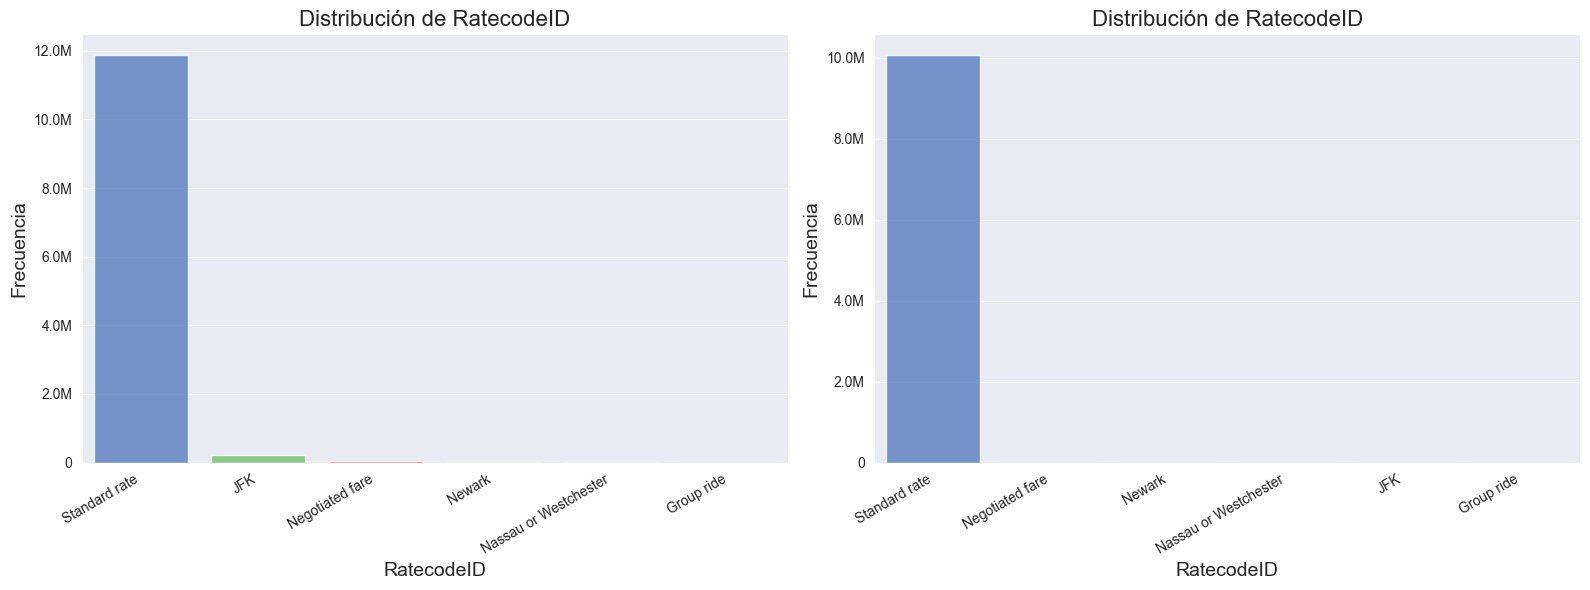

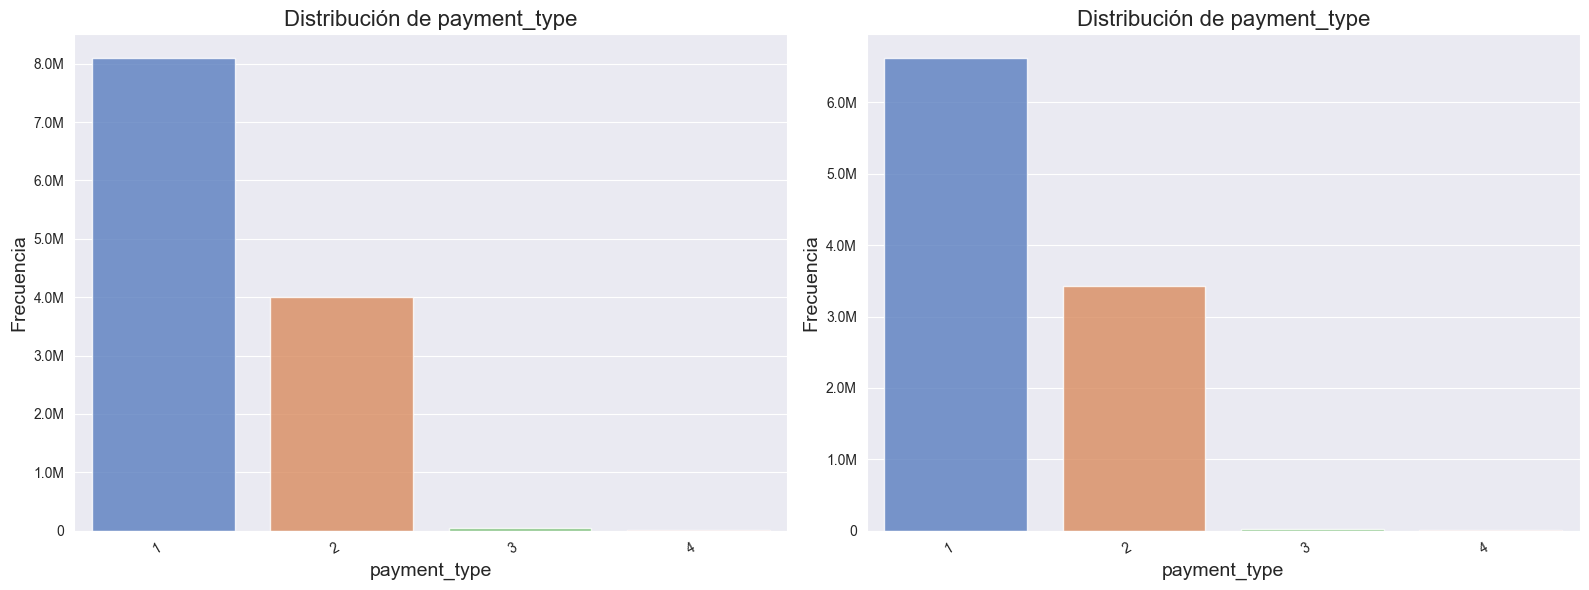

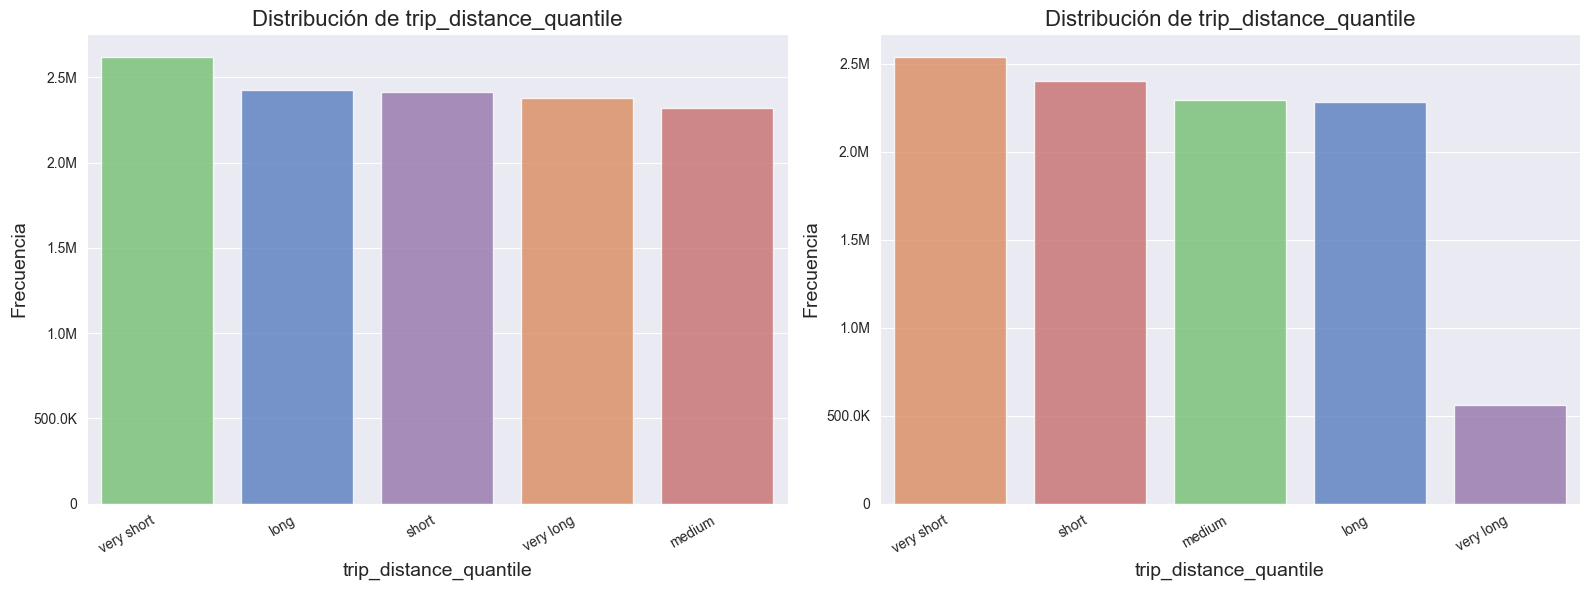

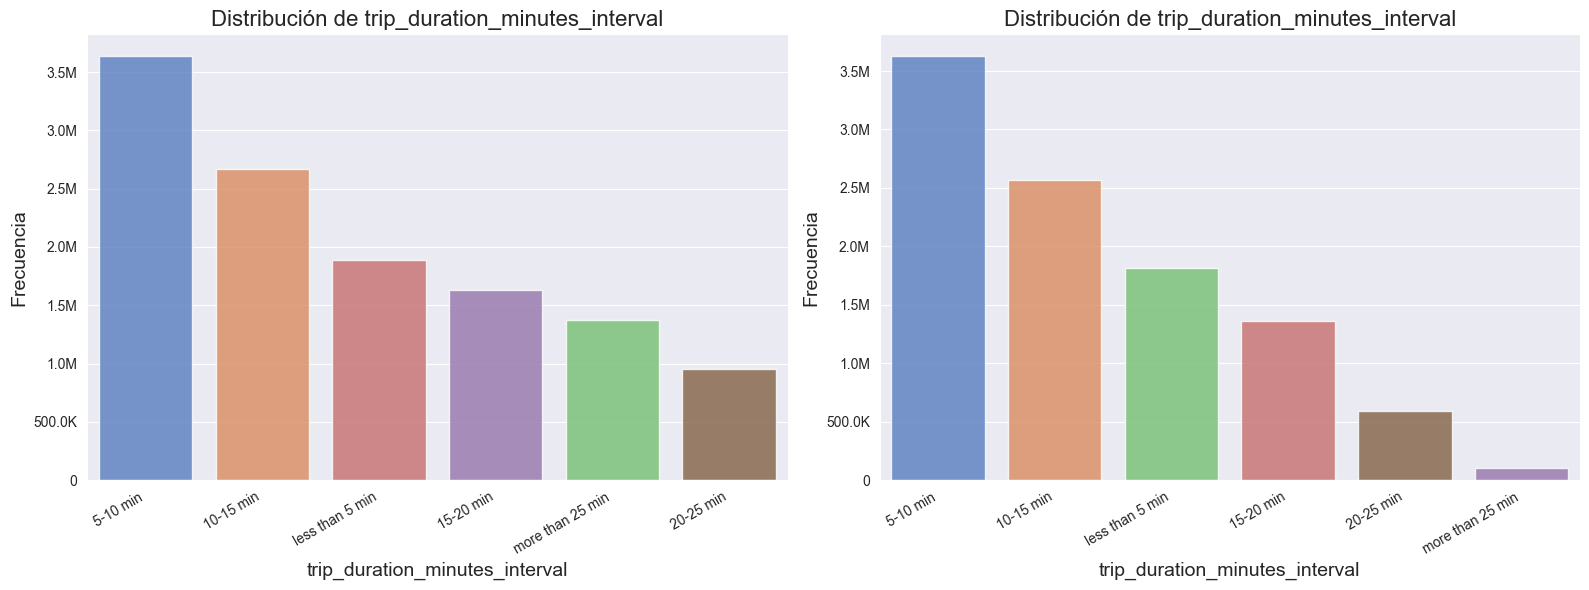

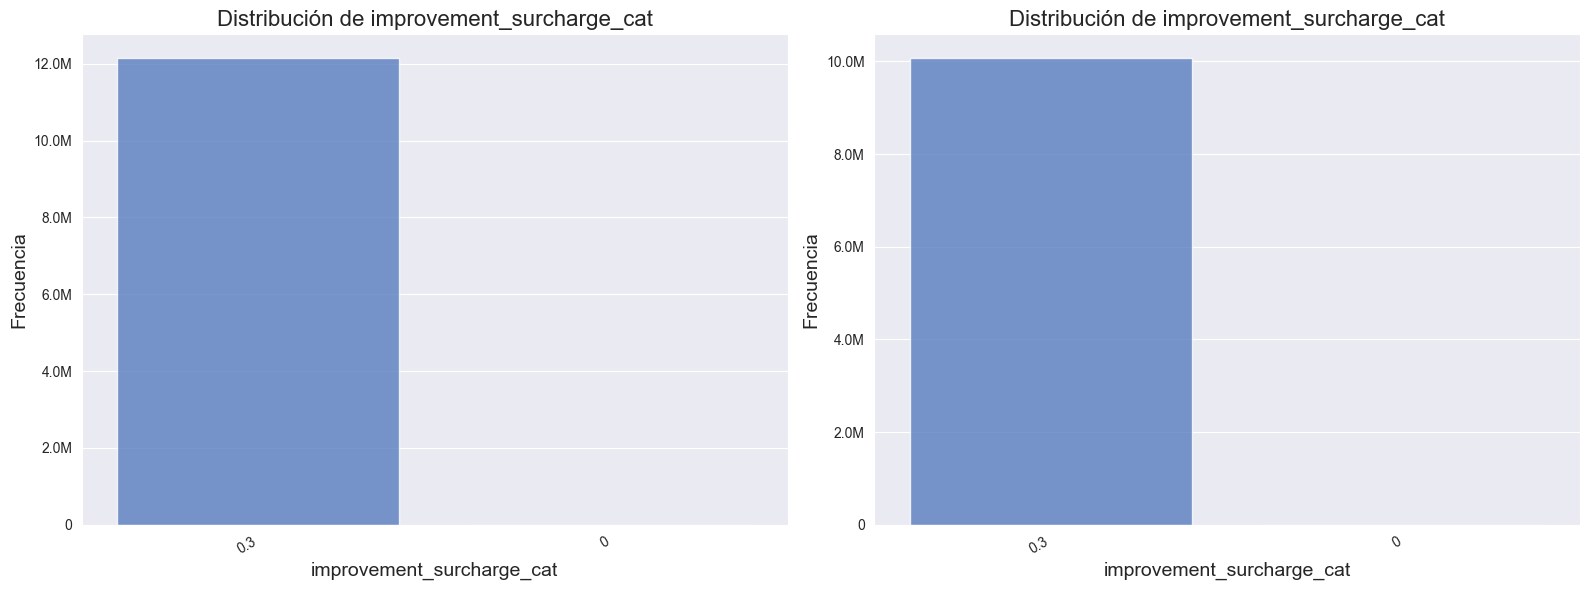

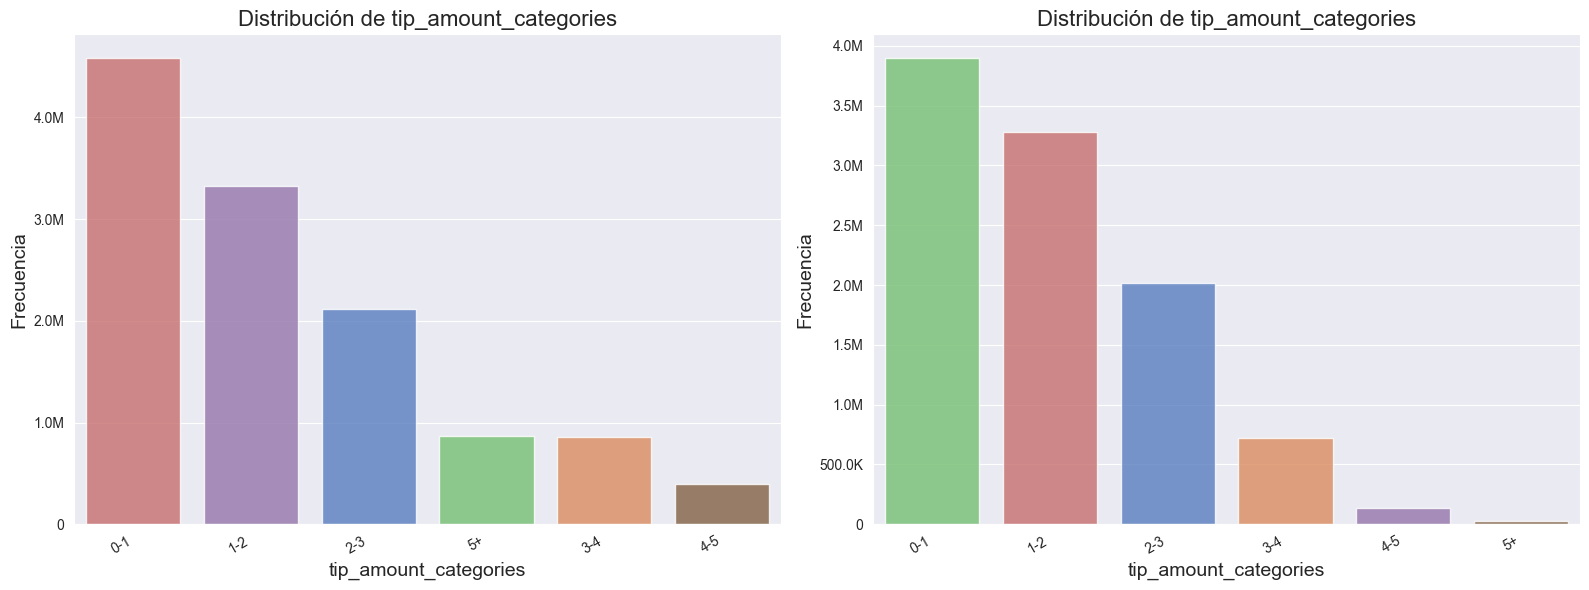

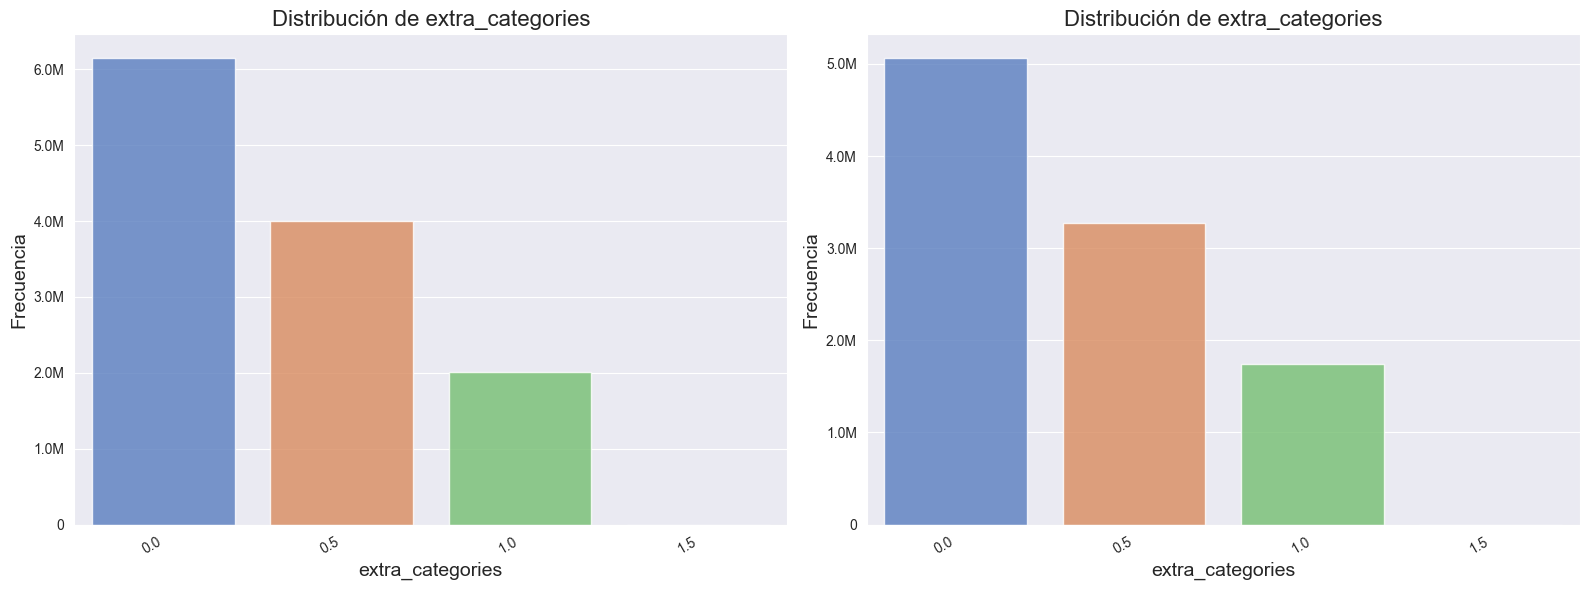

In [495]:
for var in vars_cat:
    order = data[var].value_counts().index
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(data=data, x=var, hue=var, order=order, palette="muted", alpha=0.8, legend=False)
    plt.gca().yaxis.set_major_formatter(formatter)  # Apply smart formatting
    plt.title(f'Distribución de {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()

    order_clean = data_cleaned[var].value_counts().index
    plt.subplot(1, 2, 2)
    sns.countplot(data=data_cleaned, x=var, hue=var, order=order_clean, palette="muted", alpha=0.8, legend=False)
    plt.gca().yaxis.set_major_formatter(formatter)  # Apply smart formatting
    plt.title(f'Distribución de {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

### Paso 9.2: Análisis Univeriado de Variables Númericas

#### Paso 9.2.1: Análisis Univeriado de Variables Discretas

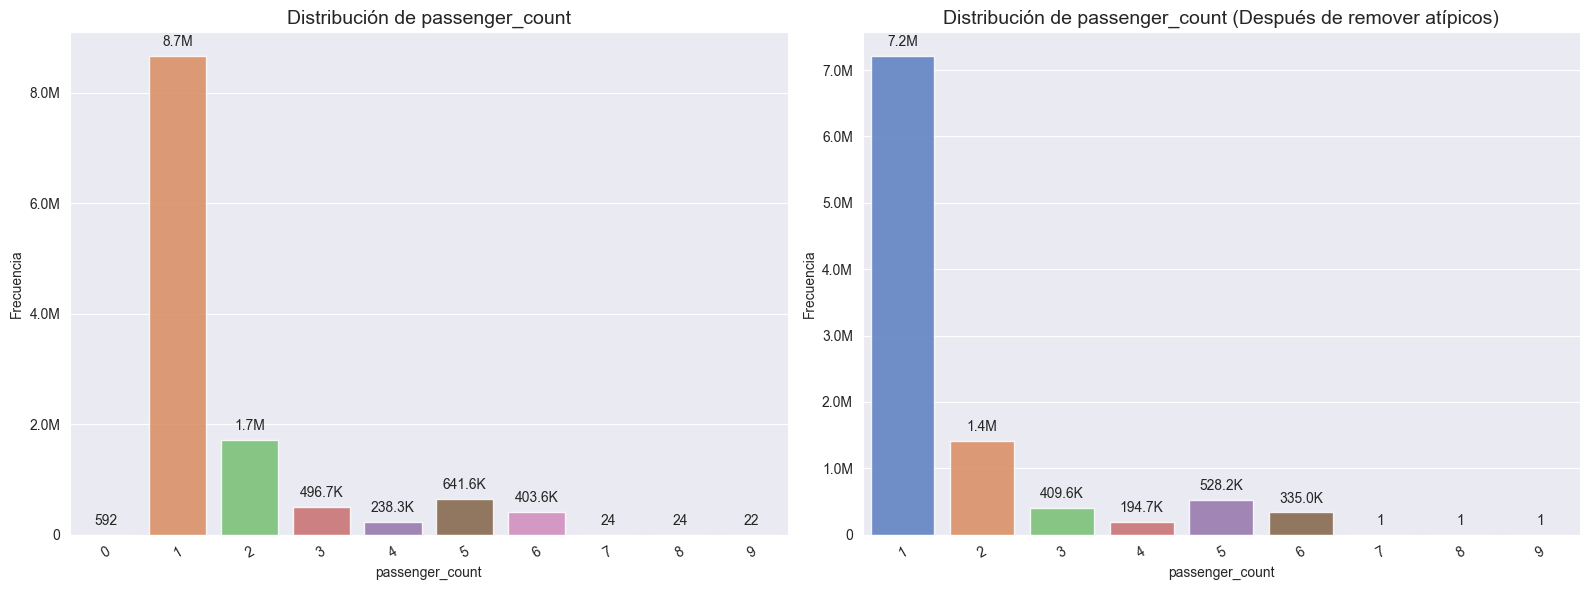

In [498]:
for var in vars_disc:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Original data
    sns.countplot(data=data, x=var, hue=var, palette="muted", alpha=0.85, ax=axs[0], legend=False)
    axs[0].yaxis.set_major_formatter(formatter)
    axs[0].set_title(f'Distribución de {var}', fontsize=14)
    axs[0].set_xlabel(var)
    axs[0].set_ylabel('Frecuencia')
    axs[0].tick_params(axis='x', rotation=30)
    annotate_bars(axs[0])

    # Cleaned data
    sns.countplot(data=data_cleaned, x=var, hue=var, palette="muted", alpha=0.85, ax=axs[1], legend=False)
    axs[1].yaxis.set_major_formatter(formatter)
    axs[1].set_title(f'Distribución de {var} (Después de remover atípicos)', fontsize=14)
    axs[1].set_xlabel(var)
    axs[1].set_ylabel('Frecuencia')
    axs[1].tick_params(axis='x', rotation=30)
    annotate_bars(axs[1])

    plt.tight_layout()
    plt.show()

#### Paso 9.2.2: Análisis Univeriado de Variables Continuas

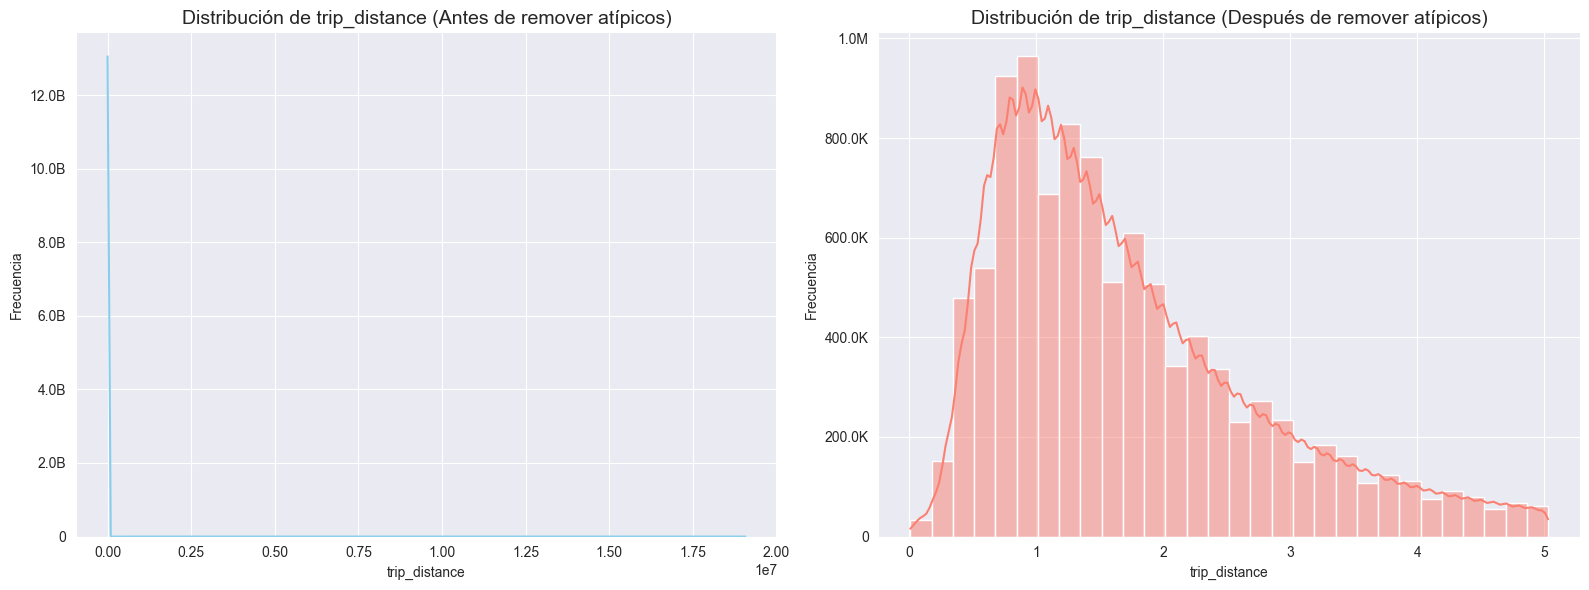

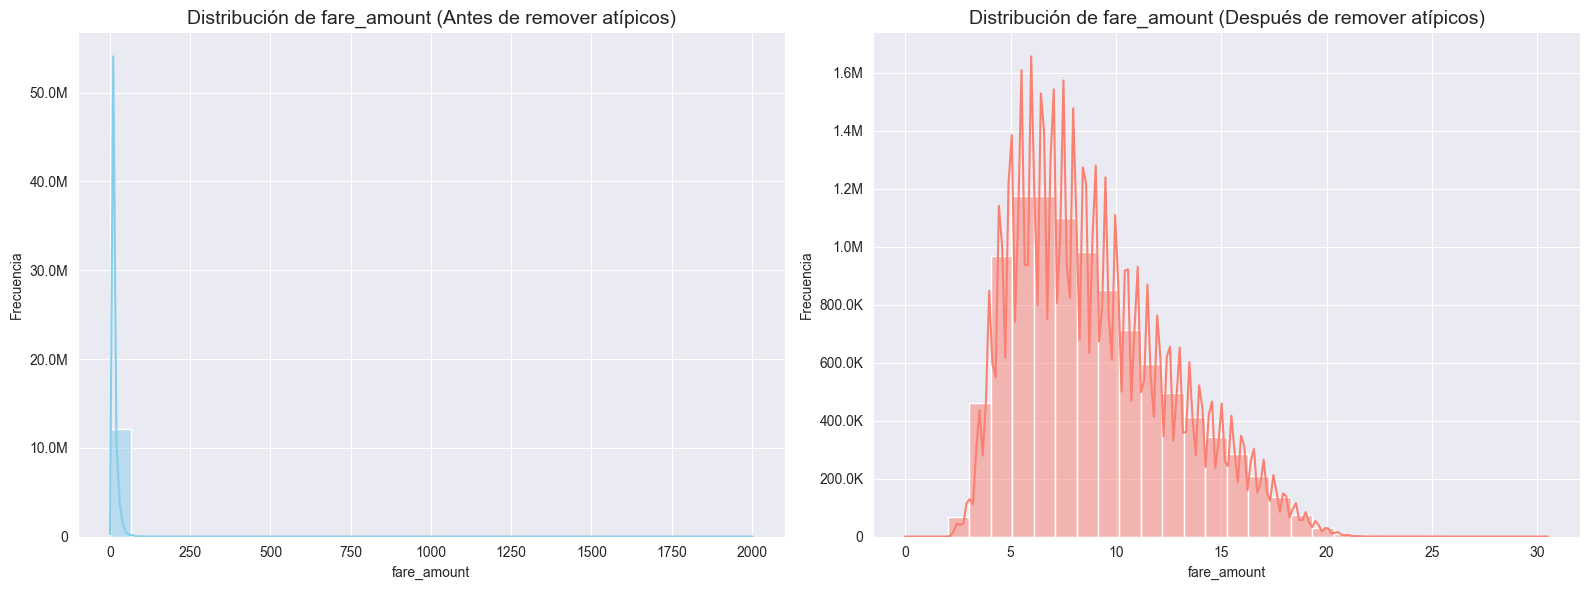

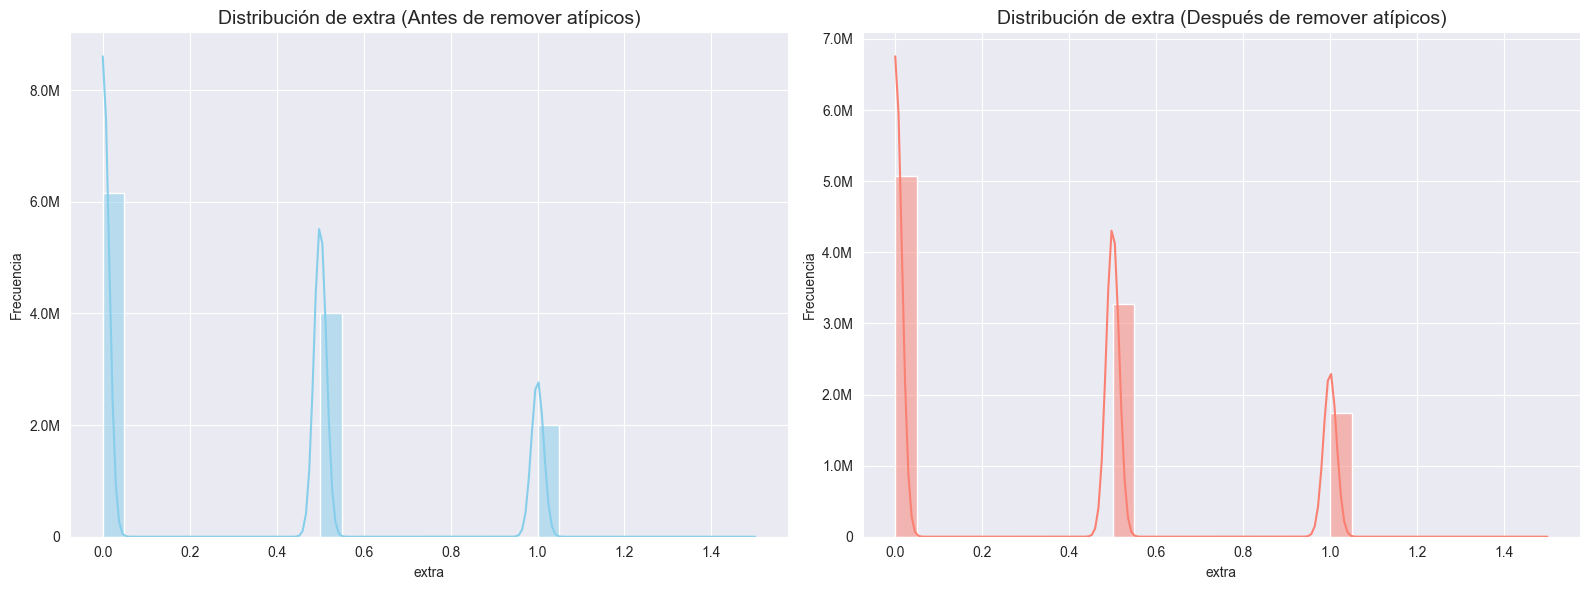

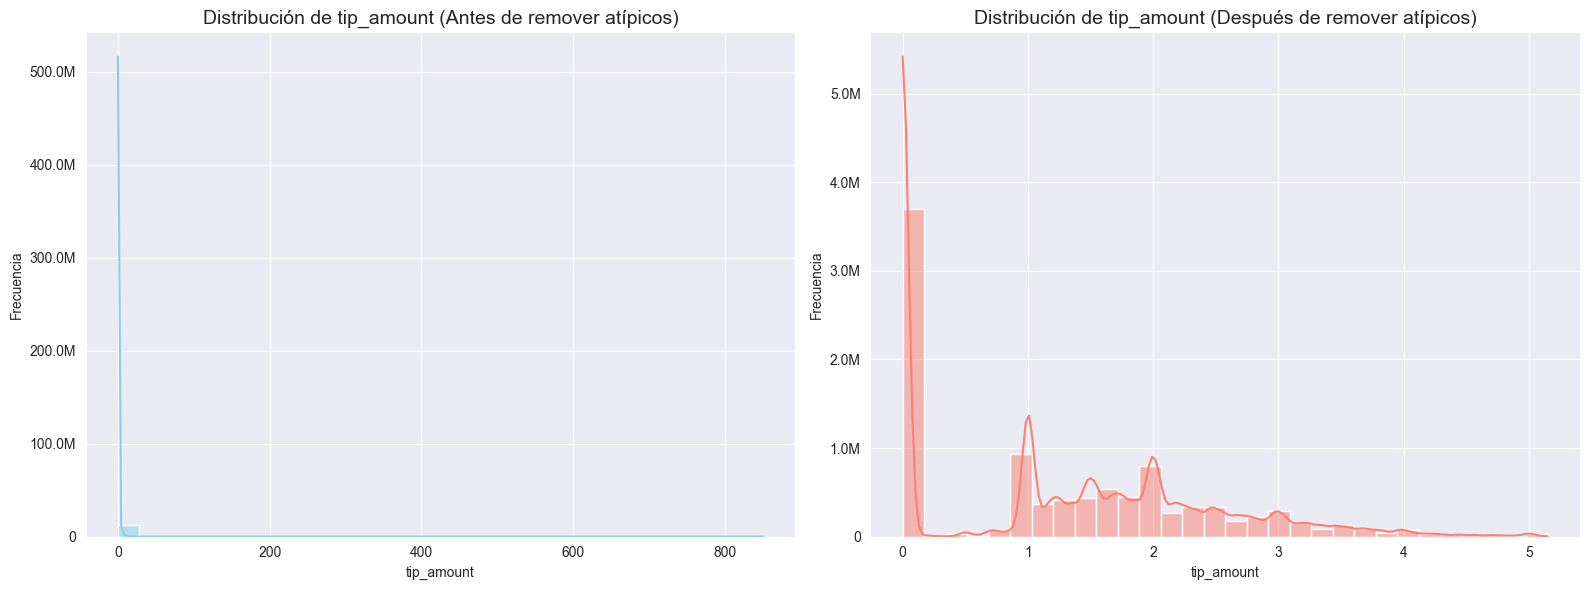

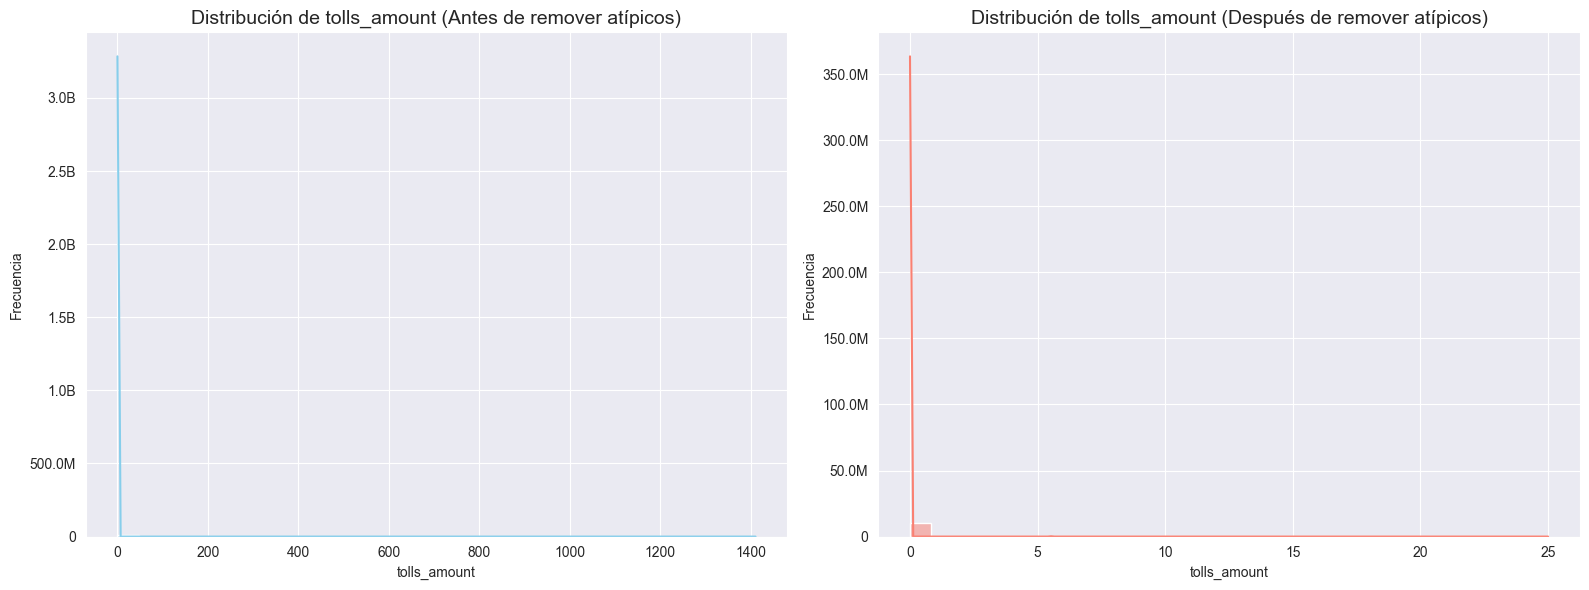

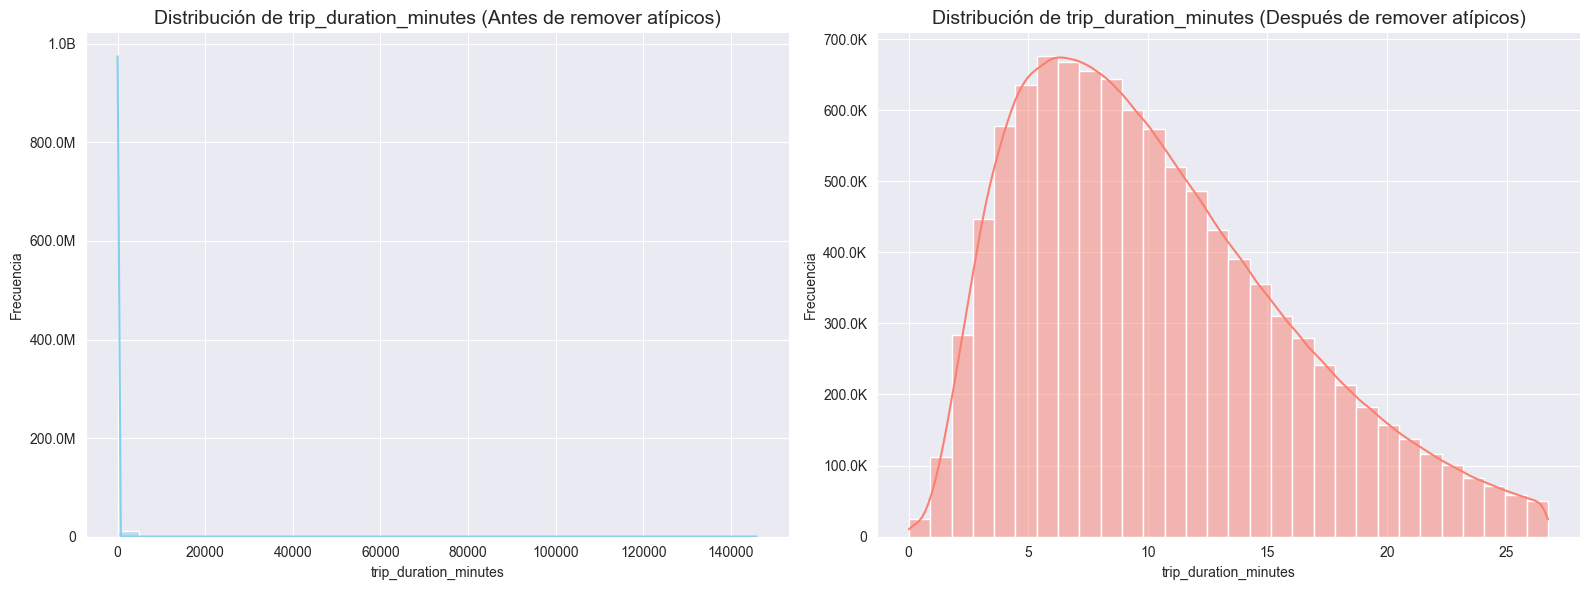

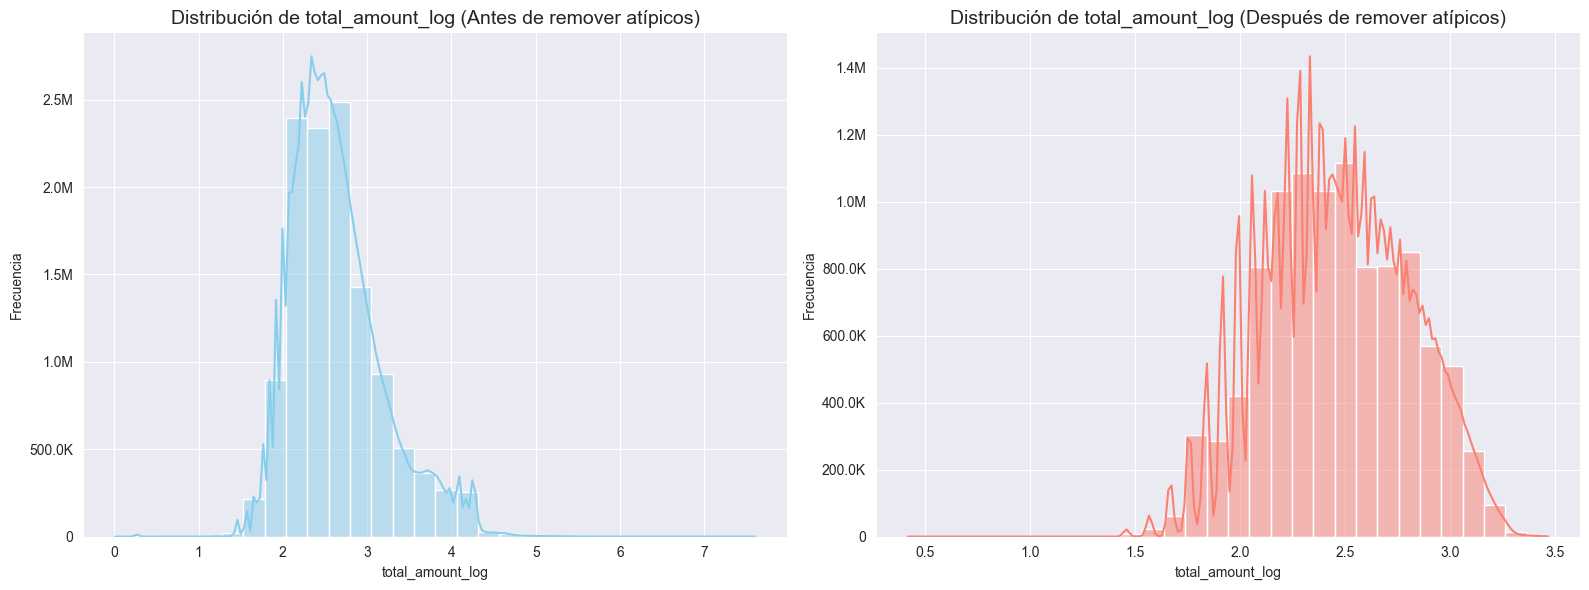

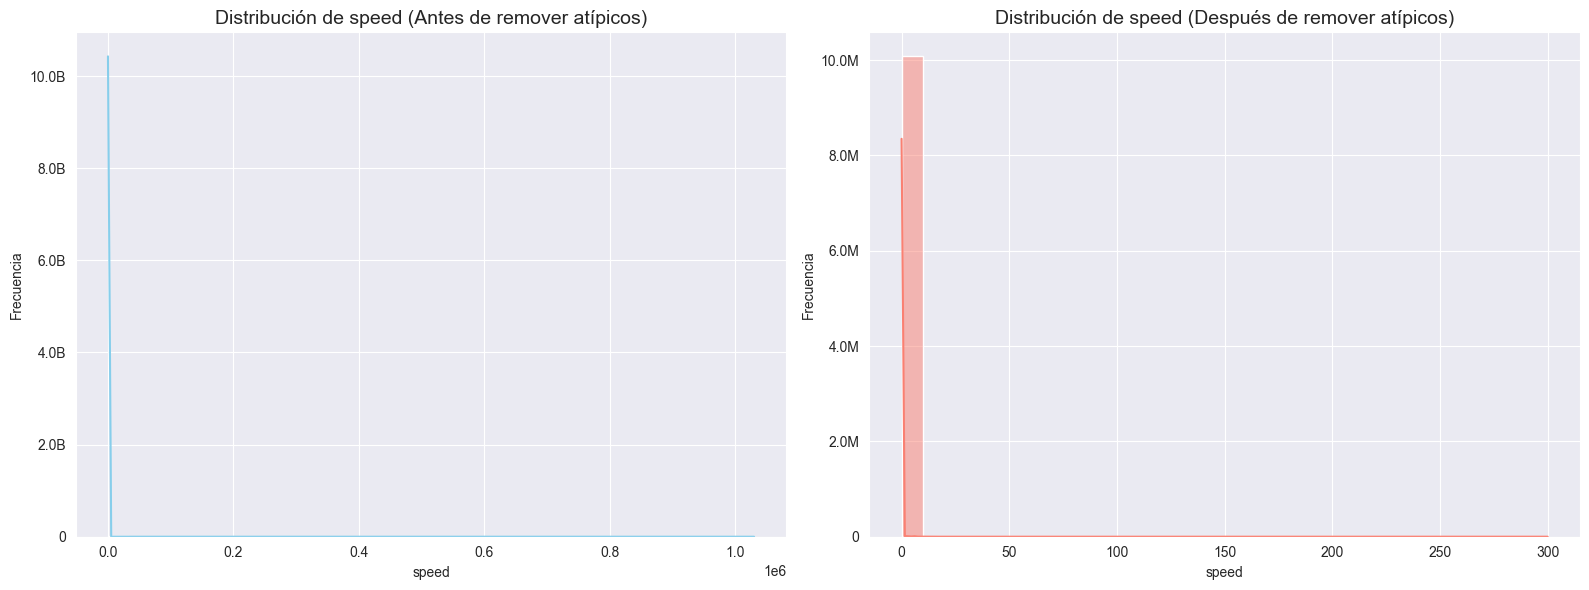

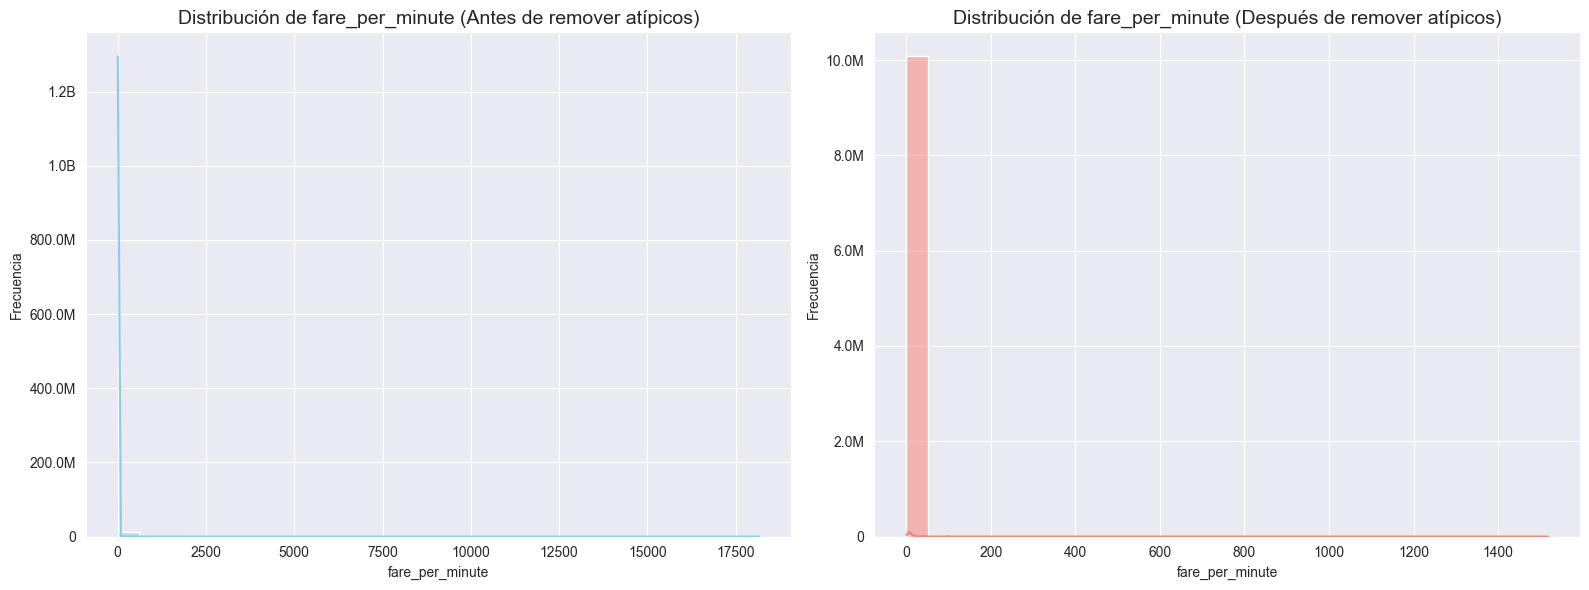

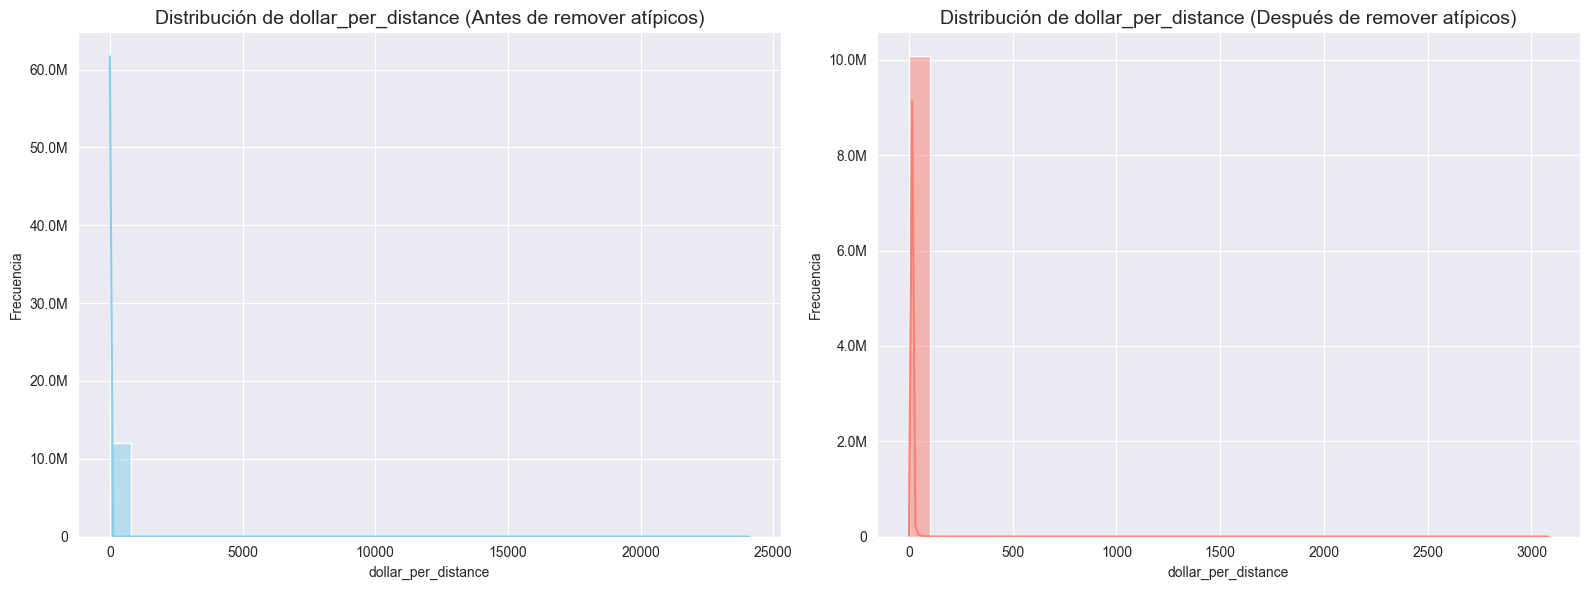

In [499]:
for var in vars_con:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Before outlier removal
    sns.histplot(data[var], kde=True, bins=30, ax=axs[0], color="skyblue")
    axs[0].yaxis.set_major_formatter(formatter)
    axs[0].set_title(f'Distribución de {var} (Antes de remover atípicos)', fontsize=14)
    axs[0].set_xlabel(var)
    axs[0].set_ylabel('Frecuencia')

    # After outlier removal
    sns.histplot(data_cleaned[var], kde=True, bins=30, ax=axs[1], color="salmon")
    axs[1].yaxis.set_major_formatter(formatter)
    axs[1].set_title(f'Distribución de {var} (Después de remover atípicos)', fontsize=14)
    axs[1].set_xlabel(var)
    axs[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

### Paso 9.3: Análisis Univeriado del Variable Objetivo

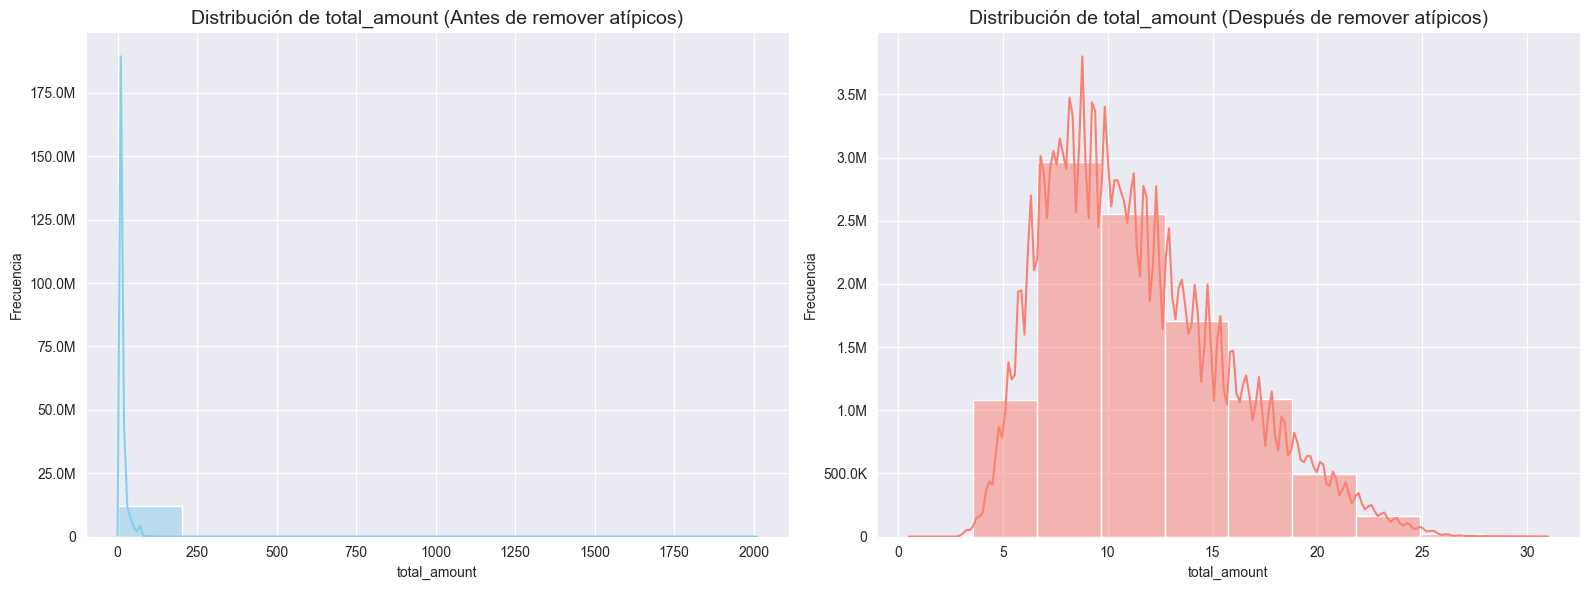

In [500]:
# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Before removing outliers
sns.histplot(data[target_var_num], kde=True, bins=10, ax=axs[0], color='skyblue')
axs[0].yaxis.set_major_formatter(formatter)
axs[0].set_title(f'Distribución de {target_var_num} (Antes de remover atípicos)', fontsize=14)
axs[0].set_xlabel(target_var_num)
axs[0].set_ylabel('Frecuencia')

# After removing outliers
sns.histplot(data_cleaned[target_var_num], kde=True, bins=10, ax=axs[1], color='salmon')
axs[1].yaxis.set_major_formatter(formatter)
axs[1].set_title(f'Distribución de {target_var_num} (Después de remover atípicos)', fontsize=14)
axs[1].set_xlabel(target_var_num)
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## Paso 10: Análisis Bivariado

### Paso 10.1: Análisis Bivariado: Relación con el Precio

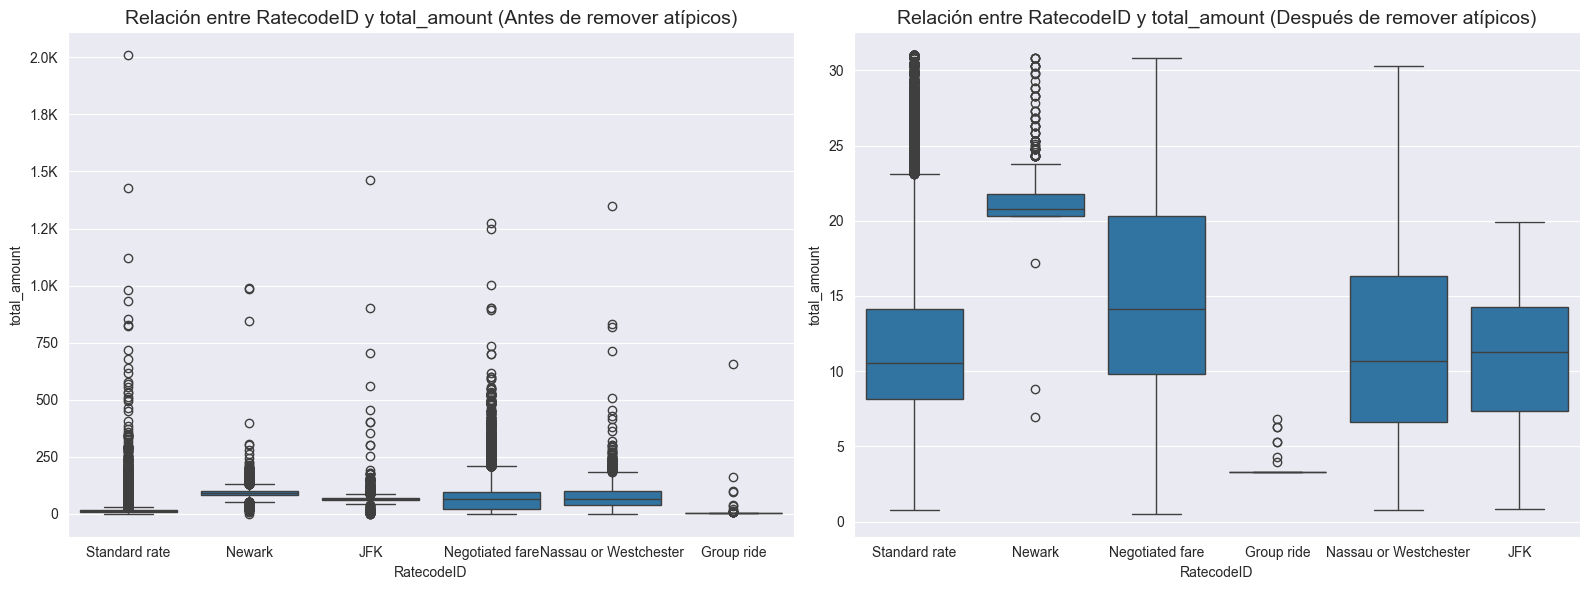

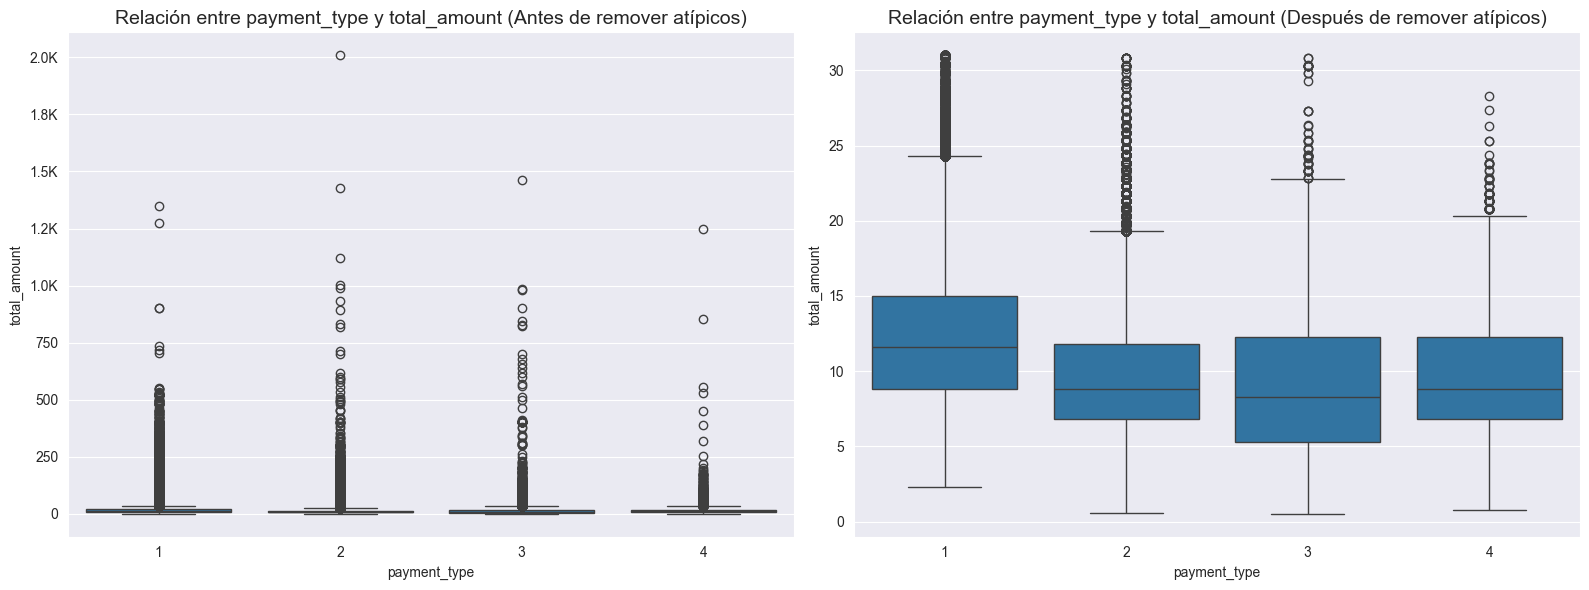

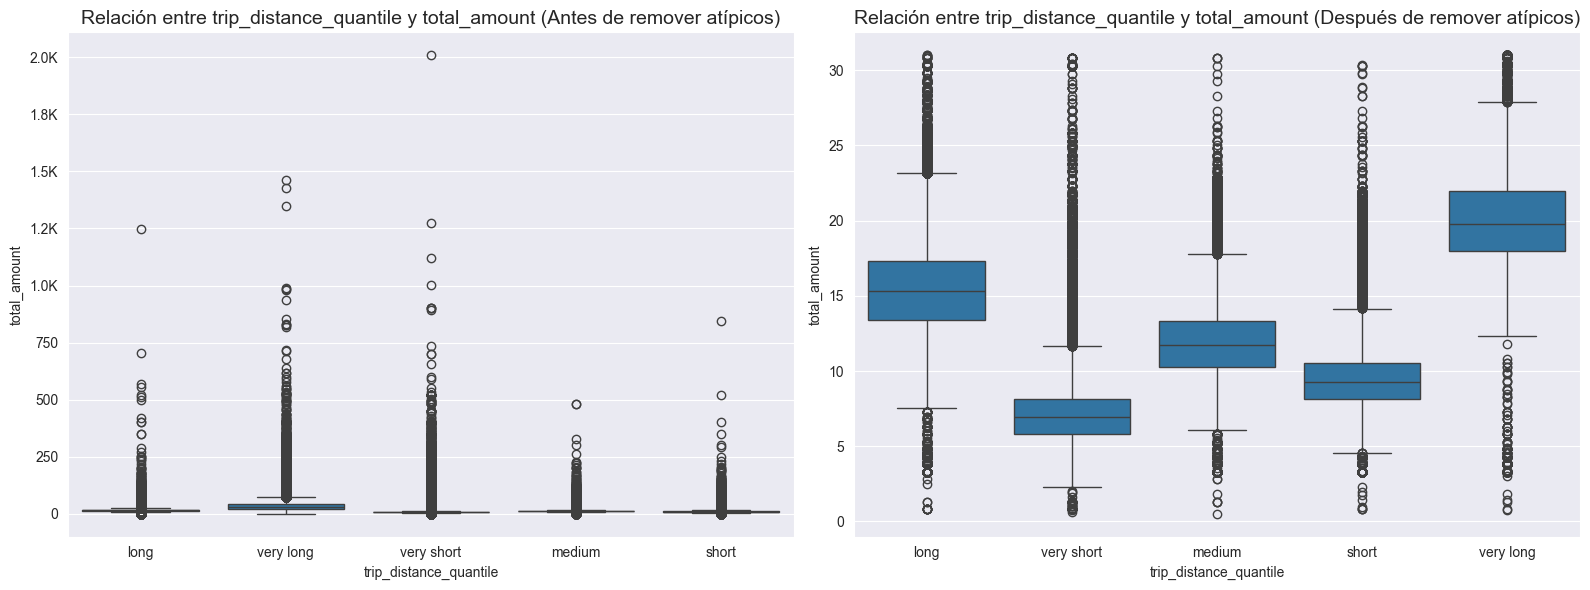

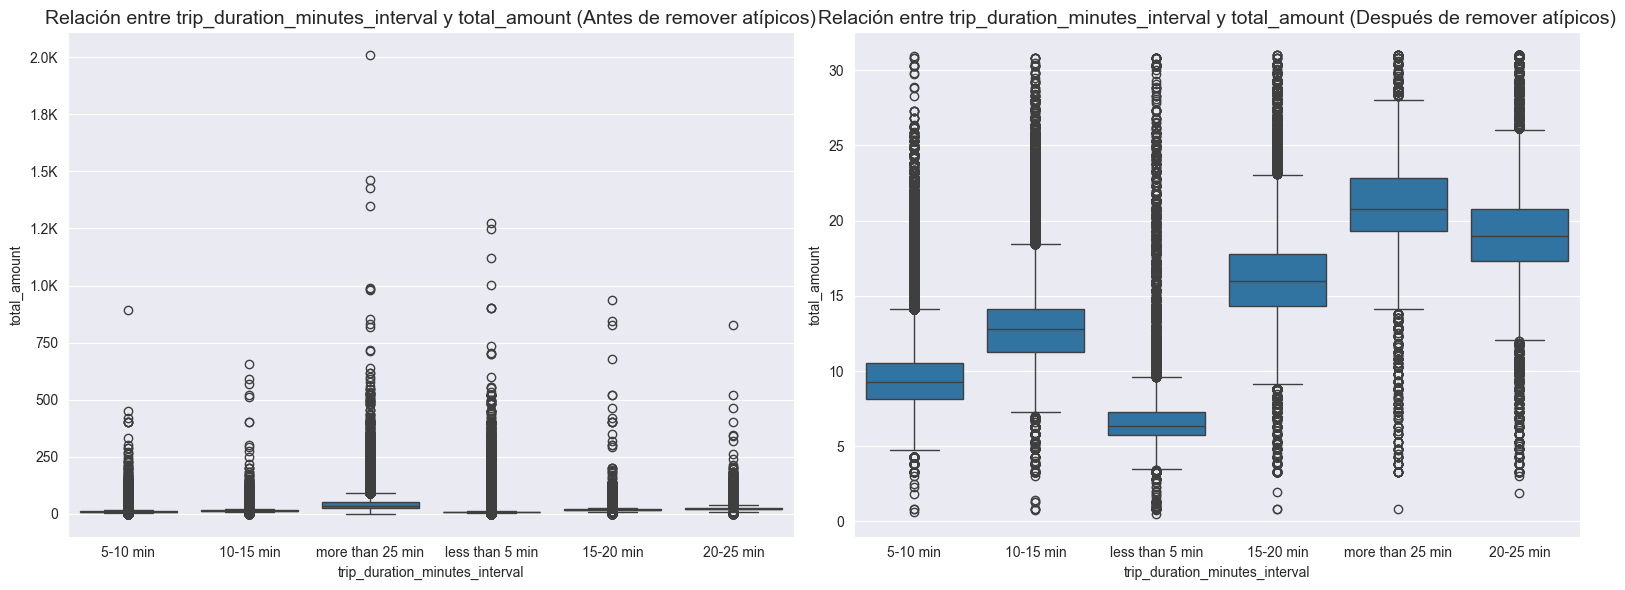

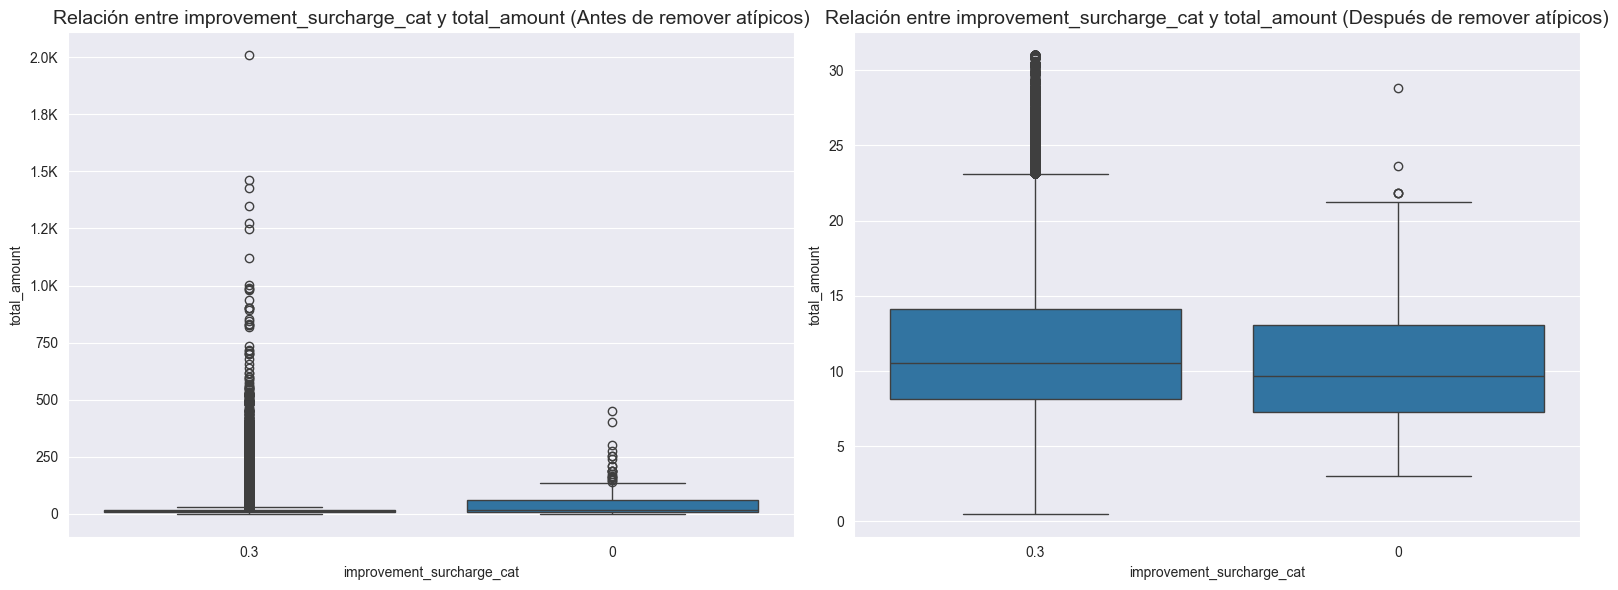

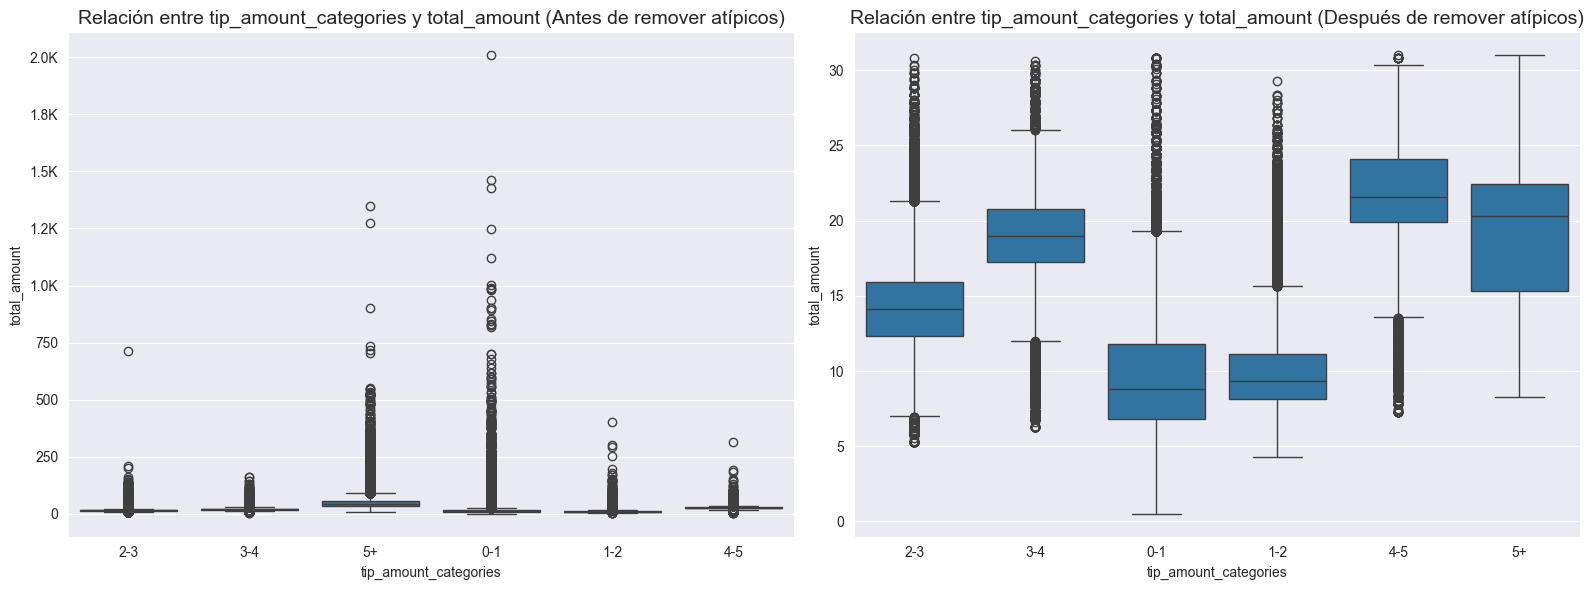

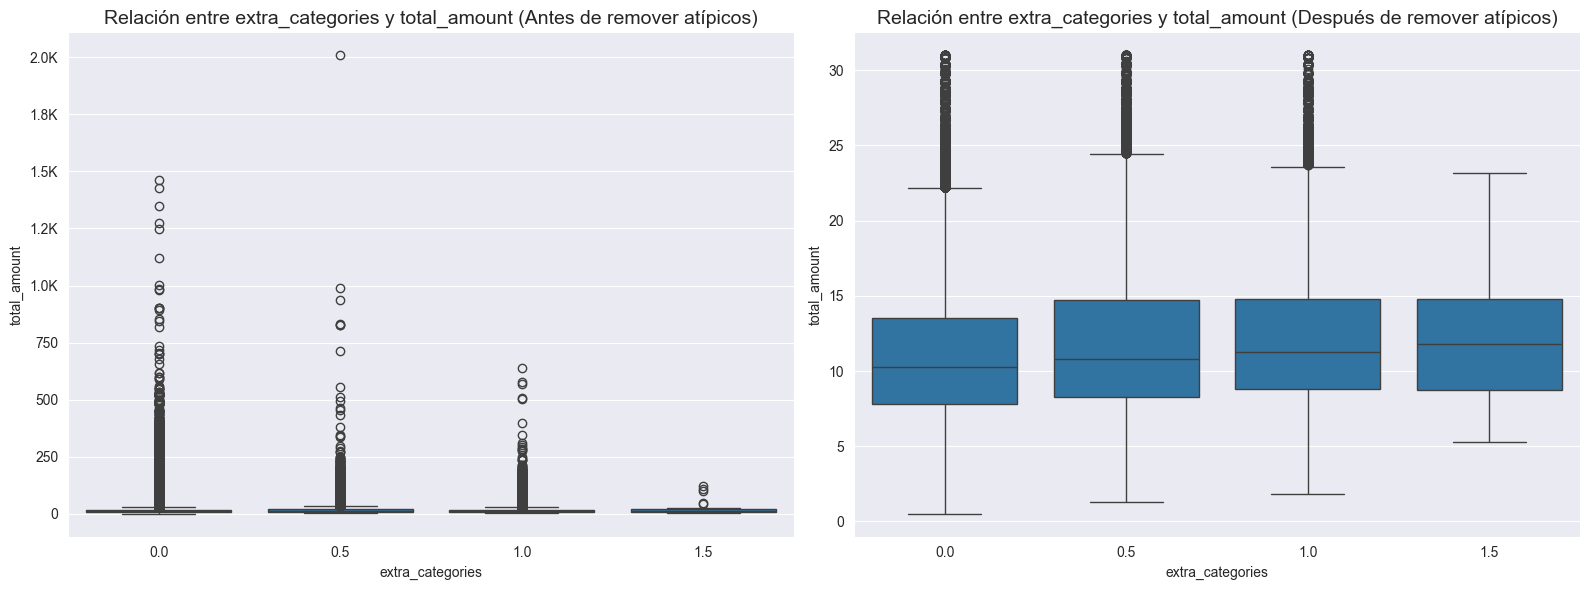

In [501]:
# Boxplot with formatted y-axis
for col in vars_cat:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Before outlier removal
    sns.boxplot(data=data, x=col, y=target_var_num, ax=axs[0])
    axs[0].yaxis.set_major_formatter(formatter)
    axs[0].set_title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    axs[0].set_xlabel(col)
    axs[0].set_ylabel(target_var_num)

    # After outlier removal
    sns.boxplot(data=data_cleaned, x=col, y=target_var_num, ax=axs[1])
    axs[1].yaxis.set_major_formatter(formatter)
    axs[1].set_title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(target_var_num)

    plt.tight_layout()
    plt.show()

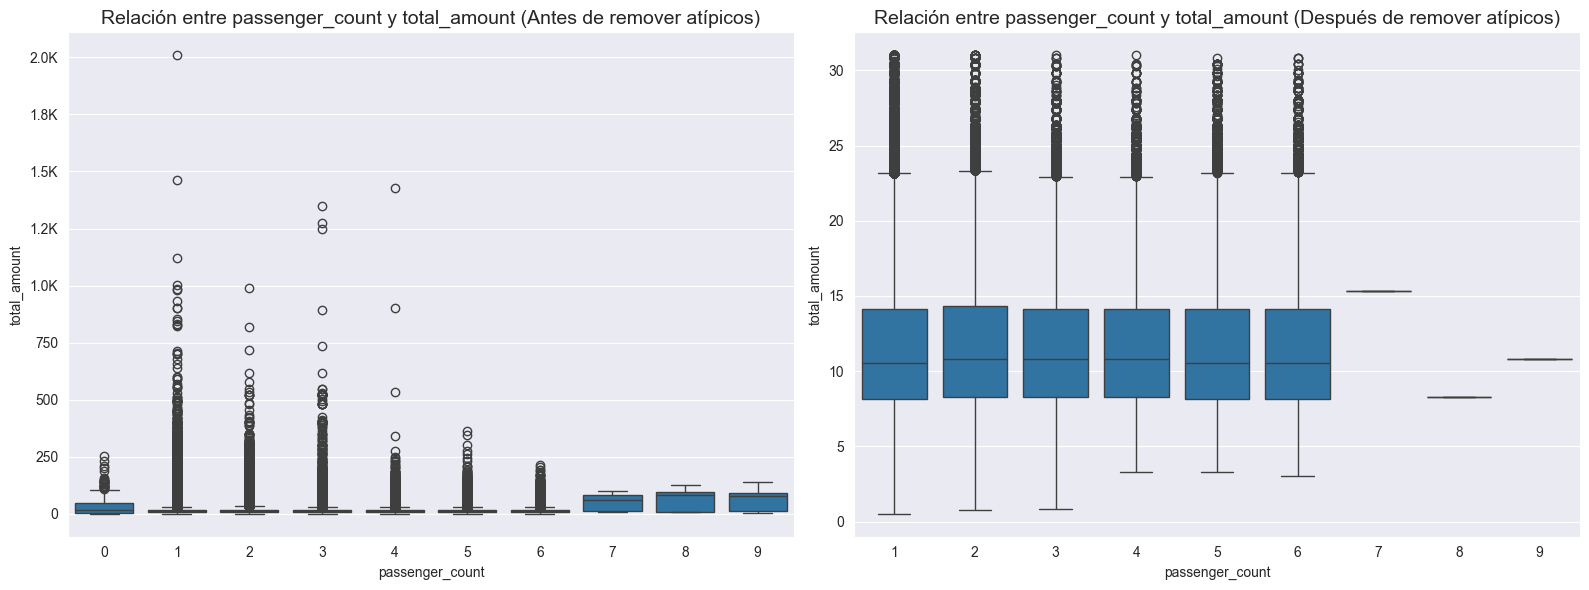

In [502]:
for col in vars_disc:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Before removing outliers
    sns.boxplot(data=data, x=col, y=target_var_num, ax=axs[0])
    axs[0].yaxis.set_major_formatter(formatter)
    axs[0].set_title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    axs[0].set_xlabel(col)
    axs[0].set_ylabel(target_var_num)

    # After removing outliers
    sns.boxplot(data=data_cleaned, x=col, y=target_var_num, ax=axs[1])
    axs[1].yaxis.set_major_formatter(formatter)
    axs[1].set_title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(target_var_num)

    plt.tight_layout()
    plt.show()

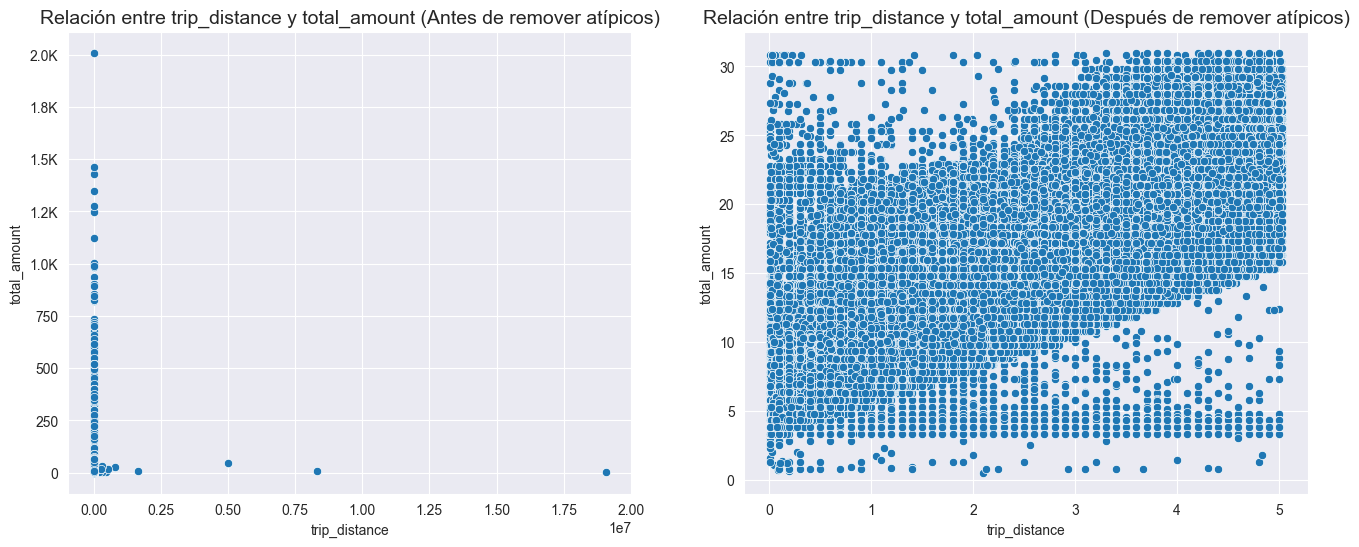

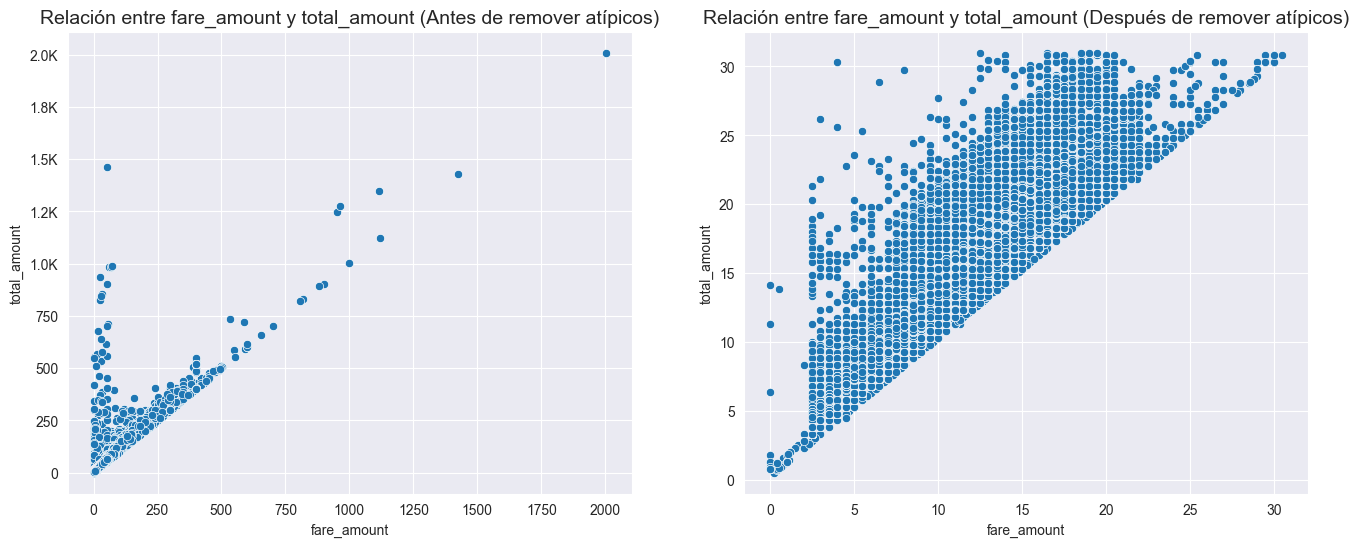

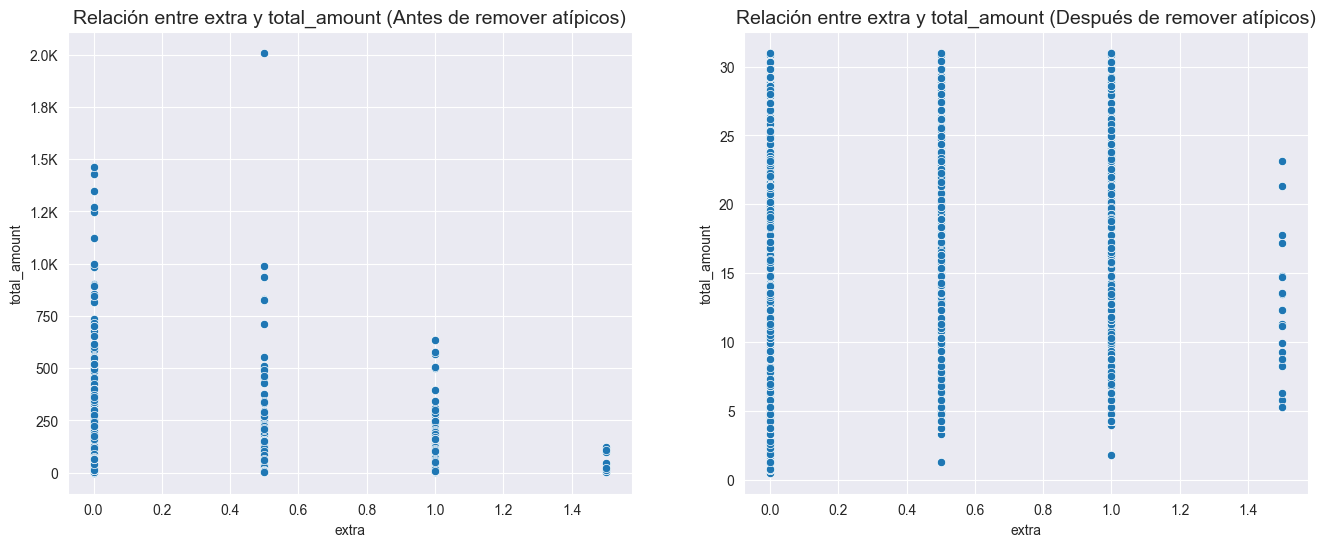

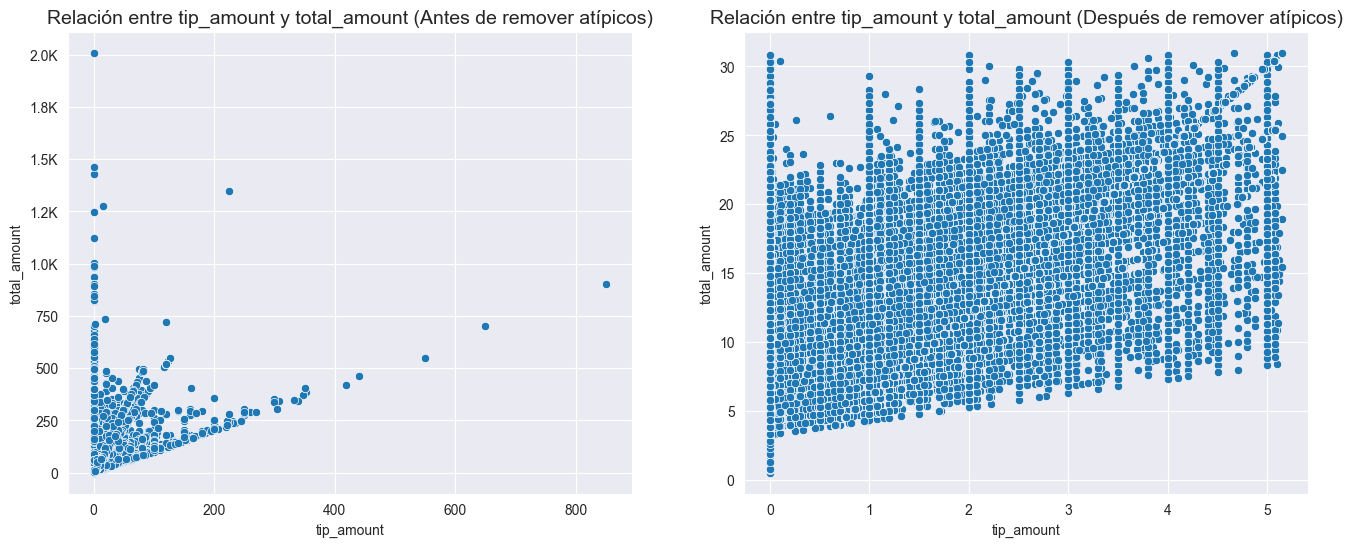

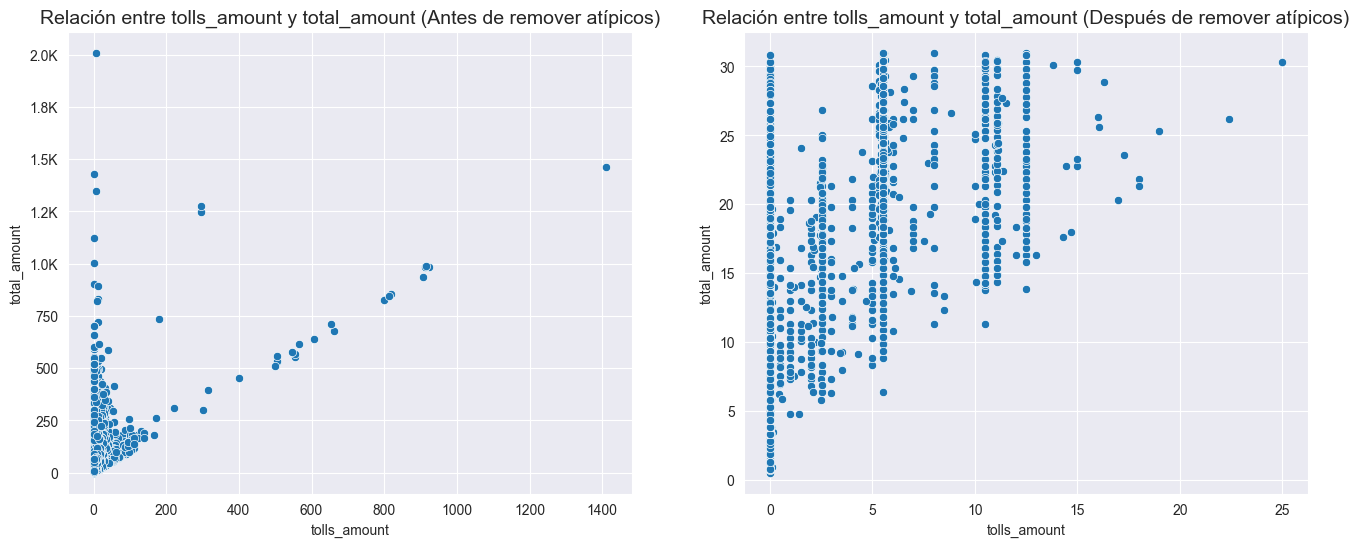

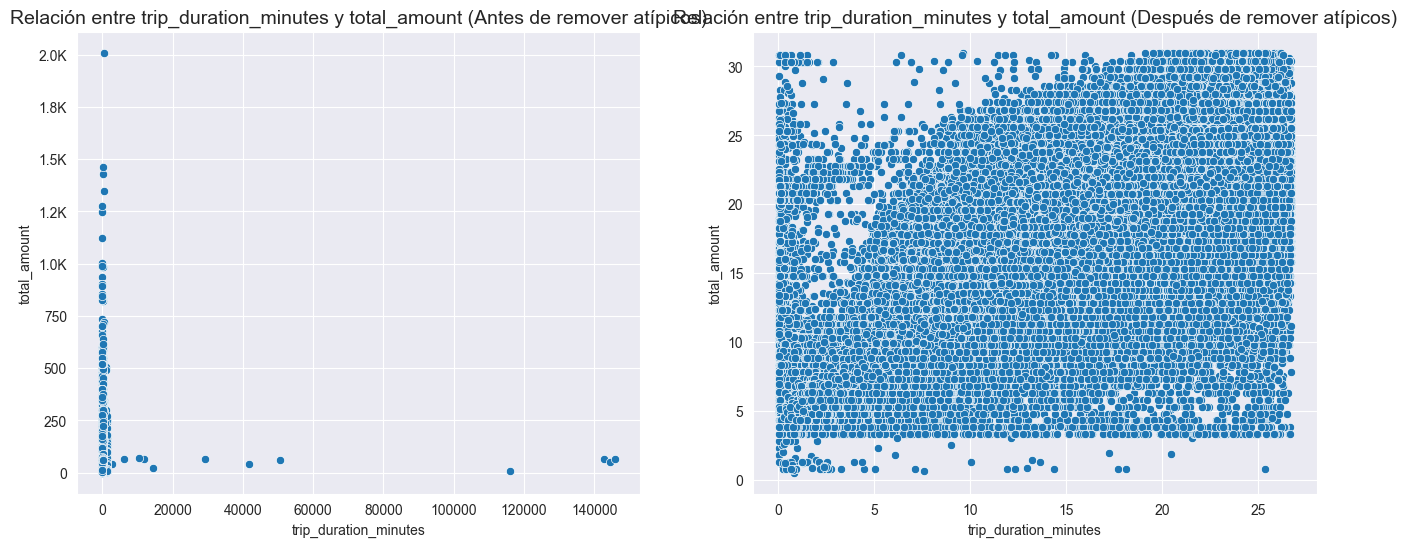

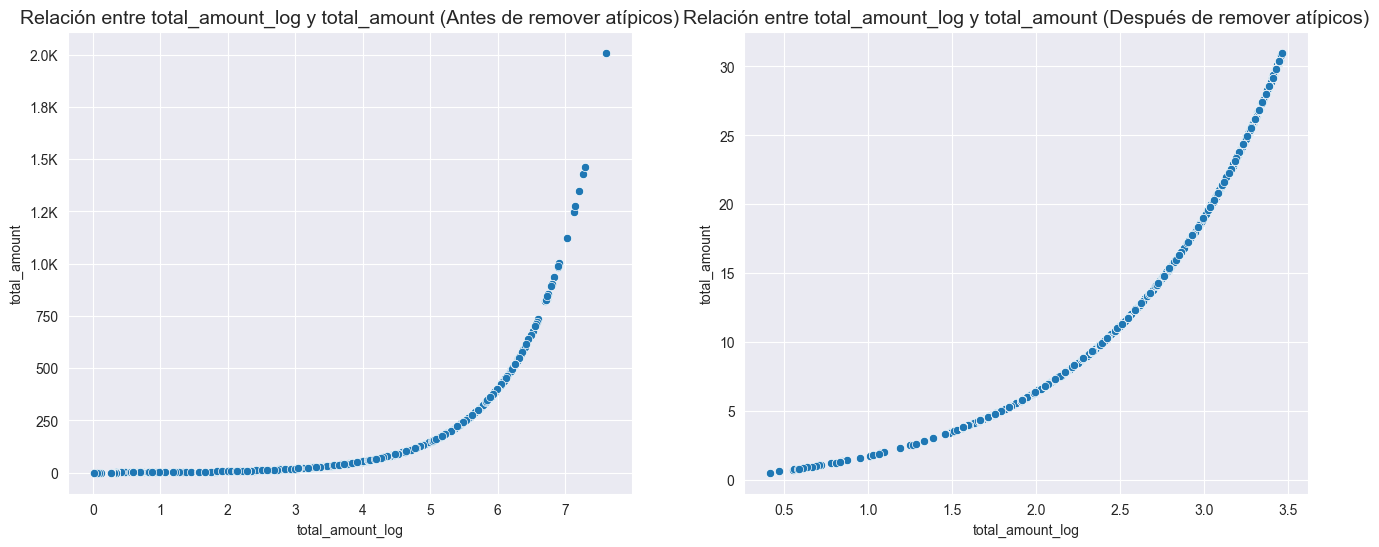

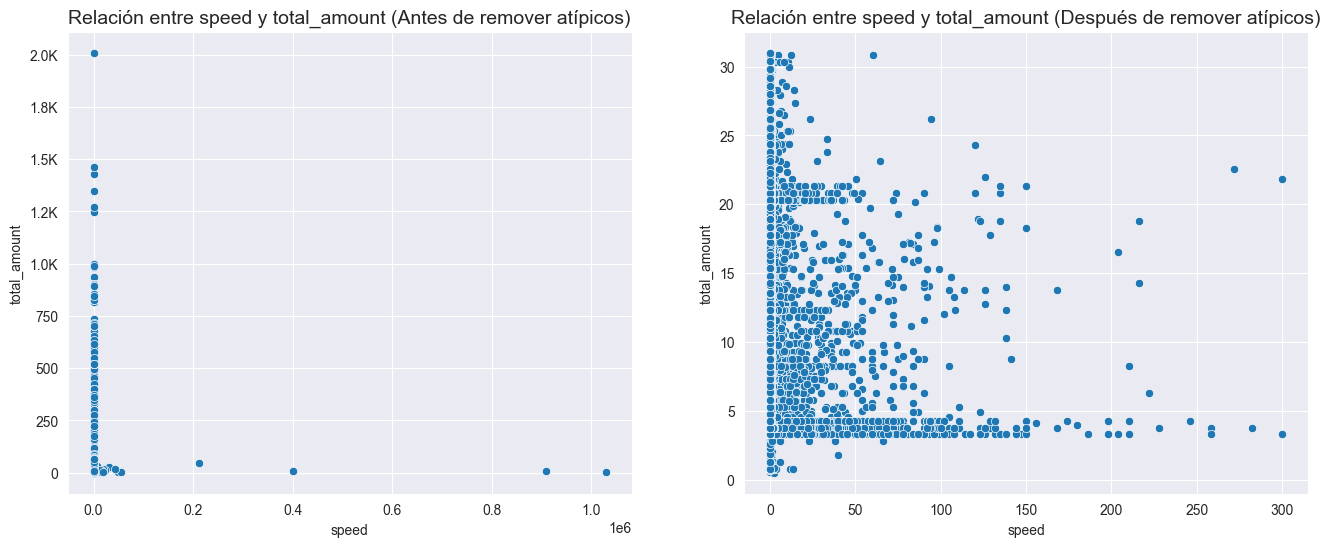

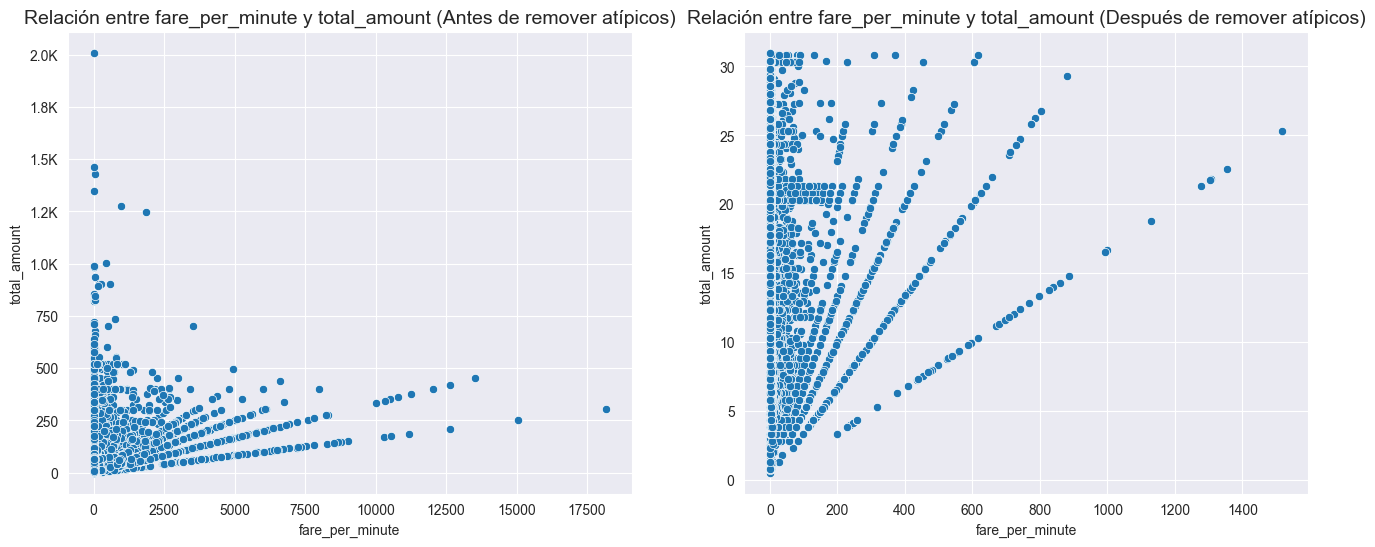

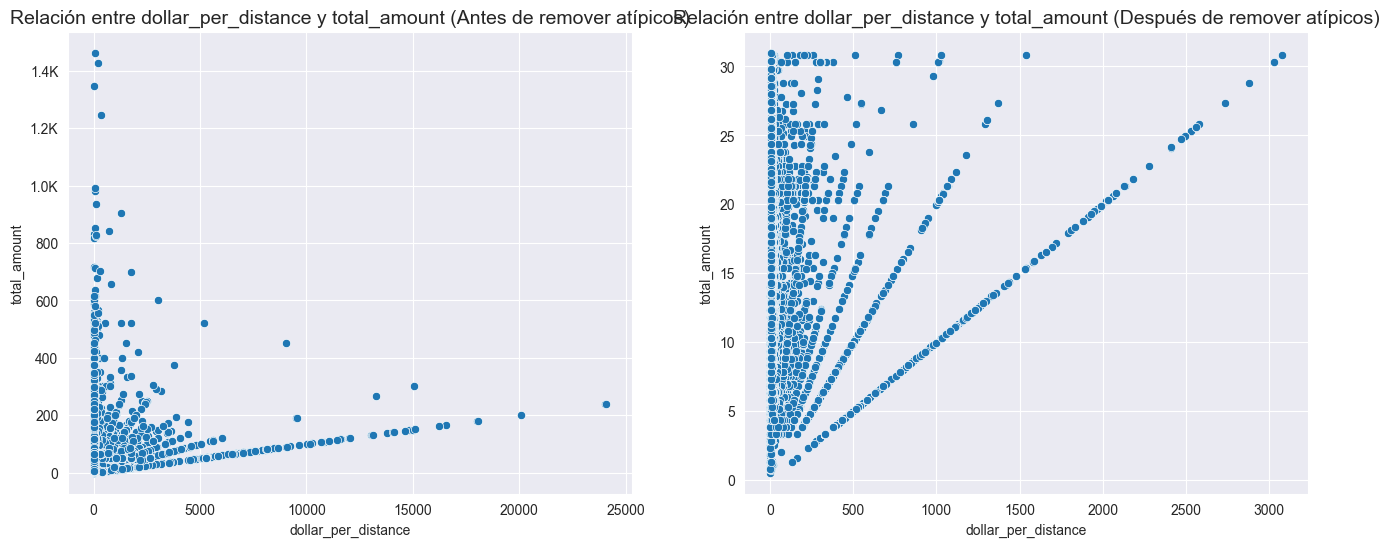

In [503]:
for col in vars_con:
    plt.figure(figsize=(16, 6))

    # Before removing outliers
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=data, x=col, y=target_var_num)
    plt.title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)
    plt.gca().yaxis.set_major_formatter(formatter)  # set formatter here

    # After removing outliers
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=data_cleaned, x=col, y=target_var_num)
    plt.title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)
    plt.gca().yaxis.set_major_formatter(formatter)  # and here

    plt.show()

## Paso 11: Análisis multivariado

### Paso 11.1: Análisis de Correlación

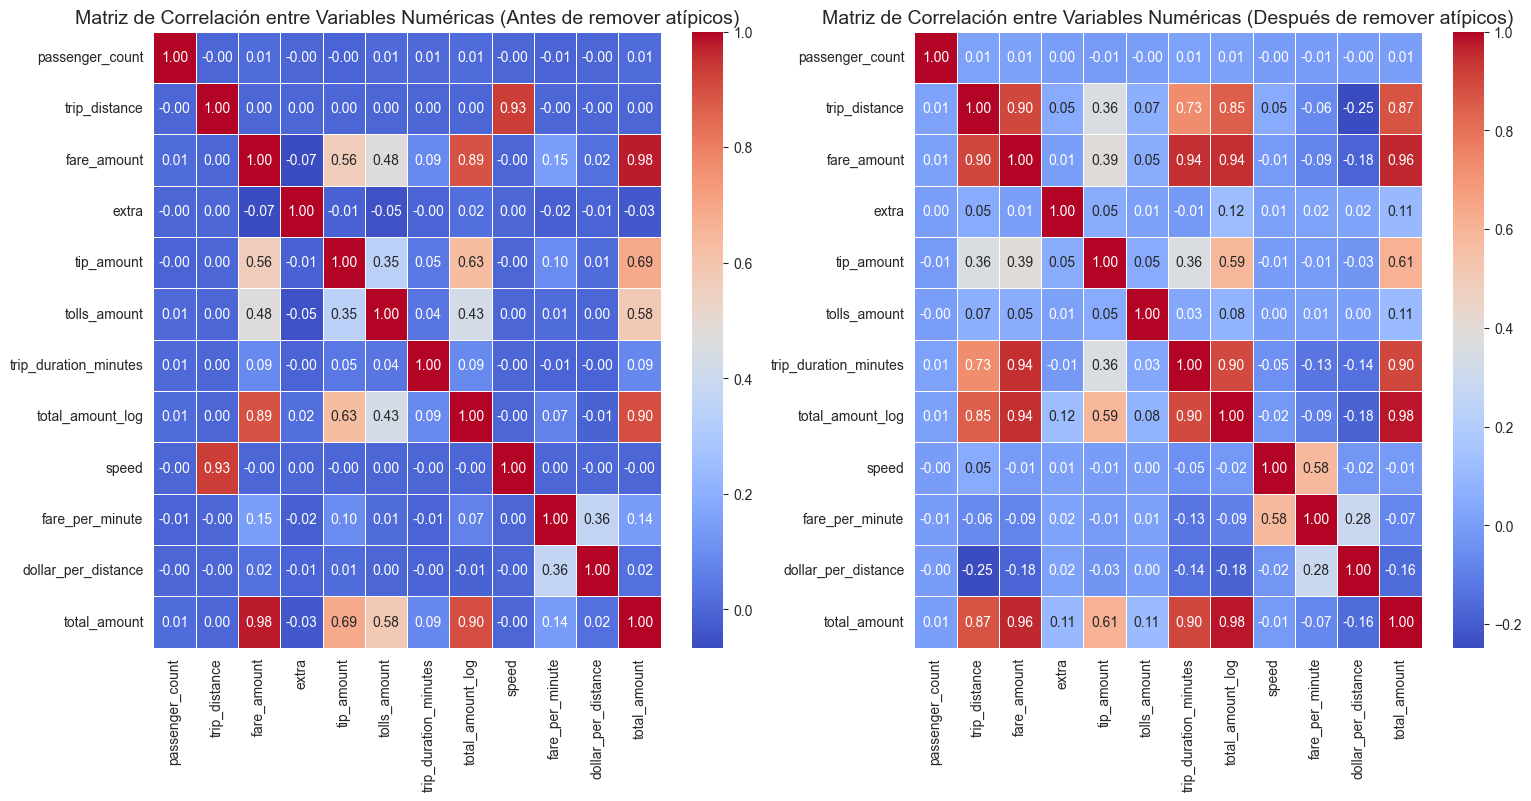

In [504]:
correlation_matrix = data[vars_nums + [target_var_num]].corr()
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas (Antes de remover atípicos)", fontsize=14)

correlation_matrix_cleaned = data_cleaned[vars_nums + [target_var_num]].corr()
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas (Después de remover atípicos)", fontsize=14)
plt.show()

## Paso 12: Pruebas de Hipótesis

## Paso 12: Modelamiento

### Paso 12.1: Modelo de regresión lineal múltiple

#### Paso 12.1.1: Preparación de los datos

In [367]:
data.head()

passenger_count  trip_distance  RatecodeID  payment_type  fare_amount  \
0                1           2.50           1             1          9.0   
1                1           2.90           1             1         11.0   
2                2          19.98           1             1         54.5   
3                3          10.78           1             1         31.5   
4                5          30.43           3             1         98.0   

   extra  tip_amount  tolls_amount  total_amount  trip_duration_minutes  \
0    0.5        2.05          0.00         12.35               7.916667   
1    0.5        3.05          0.00         15.35              11.100000   
2    0.5        8.00          0.00         63.80              31.100000   
3    0.0        3.78          5.54         41.62               0.000000   
4    0.0        0.00         15.50        113.80               0.000000   

  trip_distance_quantile trip_duration_minutes_interval  total_amount_log  \
0                   long                       5-10 min          2.591516   
1                   long                      10-15 min          2.794228   
2              very long               more than 25 min          4.171306   
3              very long                less than 5 min          3.752324   
4              very long                less than 5 min          4.743191   

      speed  fare_per_minute  dollar_per_distance improvement_surcharge_cat  \
0  0.315789         1.560000             4.940000                       0.3   
1  0.261261         1.382883             5.293103                       0.3   
2  0.642444         2.051447             3.193193                       0.3   
3       inf              inf             3.860853                       0.3   
4       inf              inf             3.739731                       0.3   

  amount_range tip_amount_categories extra_categories  
0        10-15                   2-3              0.5  
1        15-20                   3-4              0.5  
2          30+                    5+              0.5  
3          30+                   3-4              0.0  
4          30+                   0-1              0.0

In [368]:
data_cleaned.head()

passenger_count  trip_distance  RatecodeID  payment_type  fare_amount  \
0                 1           2.50           1             1          9.0   
1                 1           2.90           1             1         11.0   
8                 1           0.70           1             1          5.5   
10                2           0.54           1             2          4.0   
11                1           1.70           1             2          8.0   

    extra  tip_amount  tolls_amount  total_amount  trip_duration_minutes  \
0     0.5        2.05           0.0         12.35               7.916667   
1     0.5        3.05           0.0         15.35              11.100000   
8     0.5        2.00           0.0          8.80               4.983333   
10    0.5        0.00           0.0          5.30               2.033333   
11    0.5        0.00           0.0          9.30               7.783333   

   trip_distance_quantile trip_duration_minutes_interval  total_amount_log  \
0                    long                       5-10 min          2.591516   
1                    long                      10-15 min          2.794228   
8              very short                less than 5 min          2.282382   
10             very short                less than 5 min          1.840550   
11                 medium                       5-10 min          2.332144   

       speed  fare_per_minute  dollar_per_distance improvement_surcharge_cat  \
0   0.315789         1.560000             4.940000                       0.3   
1   0.261261         1.382883             5.293103                       0.3   
8   0.140468         1.765886            12.571429                       0.3   
10  0.265574         2.606557             9.814815                       0.3   
11  0.218415         1.194861             5.470588                       0.3   

   amount_range tip_amount_categories extra_categories  
0         10-15                   2-3              0.5  
1         15-20                   3-4              0.5  
8          5-10                   2-3              0.5  
10         5-10                   0-1              0.5  
11         5-10                   0-1              0.5

In [369]:
data_encoded = data.copy()

In [370]:
data_cleaned_encoded = data_cleaned.copy()

In [371]:
data_encoded = pd.get_dummies(data_encoded, columns=vars_cat, drop_first=True)

In [372]:
data_cleaned_encoded = pd.get_dummies(data_cleaned_encoded, columns=vars_cat, drop_first=True)

In [373]:
data_encoded.head()

passenger_count  trip_distance  RatecodeID  fare_amount  extra  tip_amount  \
0                1           2.50           1          9.0    0.5        2.05   
1                1           2.90           1         11.0    0.5        3.05   
2                2          19.98           1         54.5    0.5        8.00   
3                3          10.78           1         31.5    0.0        3.78   
4                5          30.43           3         98.0    0.0        0.00   

   tolls_amount  total_amount  trip_duration_minutes  total_amount_log  ...  \
0          0.00         12.35               7.916667          2.591516  ...   
1          0.00         15.35              11.100000          2.794228  ...   
2          0.00         63.80              31.100000          4.171306  ...   
3          5.54         41.62               0.000000          3.752324  ...   
4         15.50        113.80               0.000000          4.743191  ...   

   trip_duration_minutes_interval_more than 25 min  \
0                                            False   
1                                            False   
2                                             True   
3                                            False   
4                                            False   

   improvement_surcharge_cat_0.3  tip_amount_categories_1-2  \
0                           True                      False   
1                           True                      False   
2                           True                      False   
3                           True                      False   
4                           True                      False   

  tip_amount_categories_2-3  tip_amount_categories_3-4  \
0                      True                      False   
1                     False                       True   
2                     False                      False   
3                     False                       True   
4                     False                      False   

   tip_amount_categories_4-5  tip_amount_categories_5+  extra_categories_0.5  \
0                      False                     False                  True   
1                      False                     False                  True   
2                      False                      True                  True   
3                      False                     False                 False   
4                      False                     False                 False   

   extra_categories_1.0  extra_categories_1.5  
0                 False                 False  
1                 False                 False  
2                 False                 False  
3                 False                 False  
4                 False                 False  

[5 rows x 35 columns]

In [374]:
data_cleaned_encoded.head()

passenger_count  trip_distance  RatecodeID  fare_amount  extra  \
0                 1           2.50           1          9.0    0.5   
1                 1           2.90           1         11.0    0.5   
8                 1           0.70           1          5.5    0.5   
10                2           0.54           1          4.0    0.5   
11                1           1.70           1          8.0    0.5   

    tip_amount  tolls_amount  total_amount  trip_duration_minutes  \
0         2.05           0.0         12.35               7.916667   
1         3.05           0.0         15.35              11.100000   
8         2.00           0.0          8.80               4.983333   
10        0.00           0.0          5.30               2.033333   
11        0.00           0.0          9.30               7.783333   

    total_amount_log  ...  trip_duration_minutes_interval_more than 25 min  \
0           2.591516  ...                                            False   
1           2.794228  ...                                            False   
8           2.282382  ...                                            False   
10          1.840550  ...                                            False   
11          2.332144  ...                                            False   

    improvement_surcharge_cat_0.3  tip_amount_categories_1-2  \
0                            True                      False   
1                            True                      False   
8                            True                      False   
10                           True                      False   
11                           True                      False   

   tip_amount_categories_2-3  tip_amount_categories_3-4  \
0                       True                      False   
1                      False                       True   
8                       True                      False   
10                     False                      False   
11                     False                      False   

    tip_amount_categories_4-5  tip_amount_categories_5+  extra_categories_0.5  \
0                       False                     False                  True   
1                       False                     False                  True   
8                       False                     False                  True   
10                      False                     False                  True   
11                      False                     False                  True   

    extra_categories_1.0  extra_categories_1.5  
0                  False                 False  
1                  False                 False  
8                  False                 False  
10                 False                 False  
11                 False                 False  

[5 rows x 35 columns]

#### Paso 12.1.2: Entrenamiento

In [416]:
X = data_encoded[["trip_distance"]]
y = data_encoded[target_var_num]

In [417]:
X_cleaned = data_cleaned_encoded[[
    "trip_distance",
    "passenger_count",
    "tip_amount", "tolls_amount",
    "trip_duration_minutes",
    "fare_per_minute",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4"
    #"distance_per_dollar"
]]

y_cleaned = data_cleaned_encoded[target_var_num]

In [418]:
data_cleaned_encoded.head()

passenger_count  trip_distance  RatecodeID  fare_amount  extra  \
0                 1           2.50           1          9.0    0.5   
1                 1           2.90           1         11.0    0.5   
8                 1           0.70           1          5.5    0.5   
10                2           0.54           1          4.0    0.5   
11                1           1.70           1          8.0    0.5   

    tip_amount  tolls_amount  total_amount  trip_duration_minutes  \
0         2.05           0.0         12.35               7.916667   
1         3.05           0.0         15.35              11.100000   
8         2.00           0.0          8.80               4.983333   
10        0.00           0.0          5.30               2.033333   
11        0.00           0.0          9.30               7.783333   

    total_amount_log  ...  trip_duration_minutes_interval_more than 25 min  \
0           2.591516  ...                                            False   
1           2.794228  ...                                            False   
8           2.282382  ...                                            False   
10          1.840550  ...                                            False   
11          2.332144  ...                                            False   

    improvement_surcharge_cat_0.3  tip_amount_categories_1-2  \
0                            True                      False   
1                            True                      False   
8                            True                      False   
10                           True                      False   
11                           True                      False   

   tip_amount_categories_2-3  tip_amount_categories_3-4  \
0                       True                      False   
1                      False                       True   
8                       True                      False   
10                     False                      False   
11                     False                      False   

    tip_amount_categories_4-5  tip_amount_categories_5+  extra_categories_0.5  \
0                       False                     False                  True   
1                       False                     False                  True   
8                       False                     False                  True   
10                      False                     False                  True   
11                      False                     False                  True   

    extra_categories_1.0  extra_categories_1.5  
0                  False                 False  
1                  False                 False  
8                  False                 False  
10                 False                 False  
11                 False                 False  

[5 rows x 35 columns]

In [419]:
X_cleaned_complete = data_cleaned_encoded.drop(columns=[target_var_num, "fare_amount", target_var_cat, "total_amount_log"])  #[["extra", "tolls_amount", "tip_amount", "trip_distance", "trip_duration_minutes"]] #.drop(columns=["trip_distance_quantile", "trip_distance_interval", "fare_amount"])
y_cleaned_complete = data_cleaned_encoded[target_var_num]

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [421]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [422]:
X_train_cleaned_complete, X_test_cleaned_complete, y_train_cleaned_complete, y_test_cleaned_complete = train_test_split(X_cleaned_complete, y_cleaned_complete, test_size=0.2, random_state=42)

In [423]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, title):
    # Entrenamiento
    model.fit(X_train, y_train)

    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Cálculo de métricas
    metrics = {
        "MAE_Train": mean_absolute_error(y_train, y_pred_train),
        "RMSE_Train": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "R2_Train": r2_score(y_train, y_pred_train),
        "MAE_Test": mean_absolute_error(y_test, y_pred_test),
        "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "R2_Test": r2_score(y_test, y_pred_test)
    }

    return  y_pred_train, y_pred_test, title, metrics

In [424]:
# Define hyperparameter grids
param_grid = {
    "Lasso": {"alpha": [0.001, 0.01, 0.1, 1, 10]},
    "Ridge": {"alpha": [1e-5, 1e-3, 0.01, 0.1, 1, 10, 100, 1000]},
}

In [425]:
# Base models
base_models = {
    "Regresión Lineal Múltiple": make_pipeline(StandardScaler(), LinearRegression()),
    "Lasso": Lasso(),
    "Ridge": Ridge()
}
results = []

In [426]:
from sklearn.exceptions import ConvergenceWarning
import warnings

In [427]:
model_outputs = {}

for name, model in base_models.items():
    print(f"\nEntrenando modelo: {name}")

    use_grid_search = True

    # Hyperparameter tuning
    if use_grid_search and name in param_grid:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            grid = GridSearchCV(model, param_grid[name], cv=5, scoring='r2', error_score='raise')
            grid.fit(X_train, y_train)
            model = grid.best_estimator_
            print(f"Mejores hiperparámetros para {name}: {grid.best_params_}")

    # Original
    y_train_pred, y_pred_test, title, metrics1 = train_and_evaluate_model(
        model, X_train, X_test, y_train, y_test, f"{name} - Datos Originales")
    results.append({"Modelo": name + " - Original", **metrics1})
    residuals = y_test - y_pred_test

    # Cleaned (3-variable)
    y_train_pred_cleaned, y_pred_test_cleaned, title_cleaned, metrics2_cleaned = train_and_evaluate_model(
        model, X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned, f"{name} - Datos Procesados")
    results.append({"Modelo": name + " - Procesado 3 Variables", **metrics2_cleaned})
    residuals_cleaned = y_test_cleaned - y_pred_test_cleaned

    # Cleaned (full)
    y_train_pred_complete, y_pred_test_cleaned_complete, title_cleaned_complete, metrics2_cleaned_complete = train_and_evaluate_model(
        model, X_train_cleaned_complete, X_test_cleaned_complete, y_train_cleaned_complete, y_test_cleaned_complete, f"{name} - Datos Procesados")
    results.append({"Modelo": name + " - Procesado Completo", **metrics2_cleaned_complete})
    residuals_complete = y_test_cleaned_complete - y_pred_test_cleaned_complete

    # Guardar todo para análisis posterior
    model_outputs[name] = {
        "original": (y_test, y_pred_test, residuals, title),
        "cleaned": (y_test_cleaned, y_pred_test_cleaned, residuals_cleaned, title_cleaned),
        "complete": (y_test_cleaned_complete, y_pred_test_cleaned_complete, residuals_complete, title_cleaned_complete)
    }


Entrenando modelo: Regresión Lineal Múltiple

Entrenando modelo: Lasso
Mejores hiperparámetros para Lasso: {'alpha': 10}

Entrenando modelo: Ridge
Mejores hiperparámetros para Ridge: {'alpha': 1000}


#### Paso 12.1.3: Prueba de Supuestos

##### Paso 12.1.3.1: Prueba de Linealidad

##### Paso 12.1.3.2: Prueba de Normalidad


📊 Análisis de residuos para modelo: Regresión Lineal Múltiple


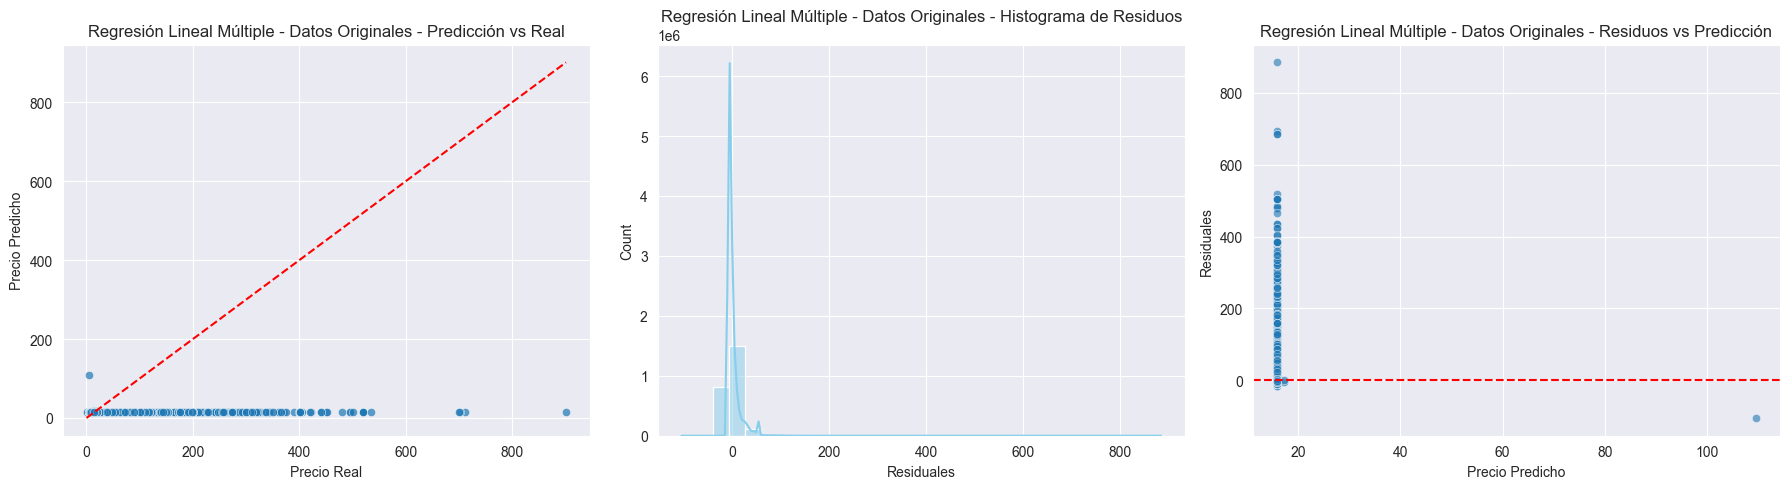

C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2431475.
  res = hypotest_fun_out(*samples, **kwds)


Regresión Lineal Múltiple - Datos Originales → Shapiro-Wilk: estadístico=0.6579, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


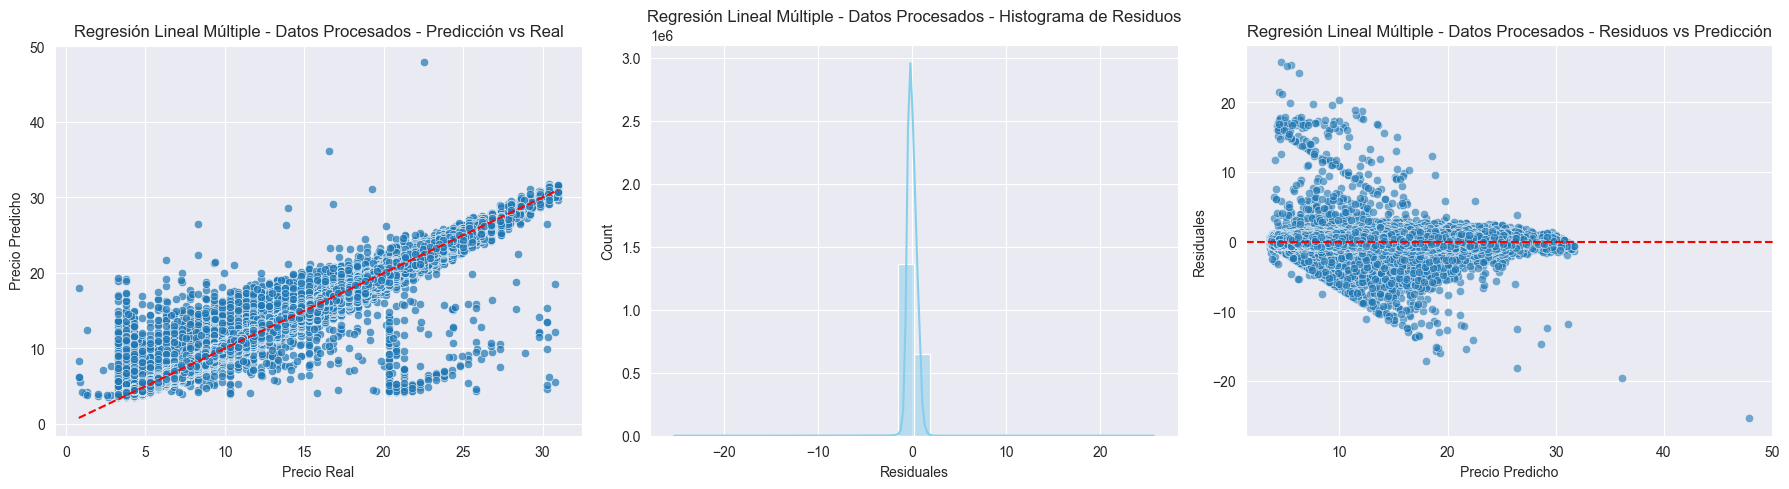

C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2015993.
  res = hypotest_fun_out(*samples, **kwds)


Regresión Lineal Múltiple - Datos Procesados → Shapiro-Wilk: estadístico=0.8872, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


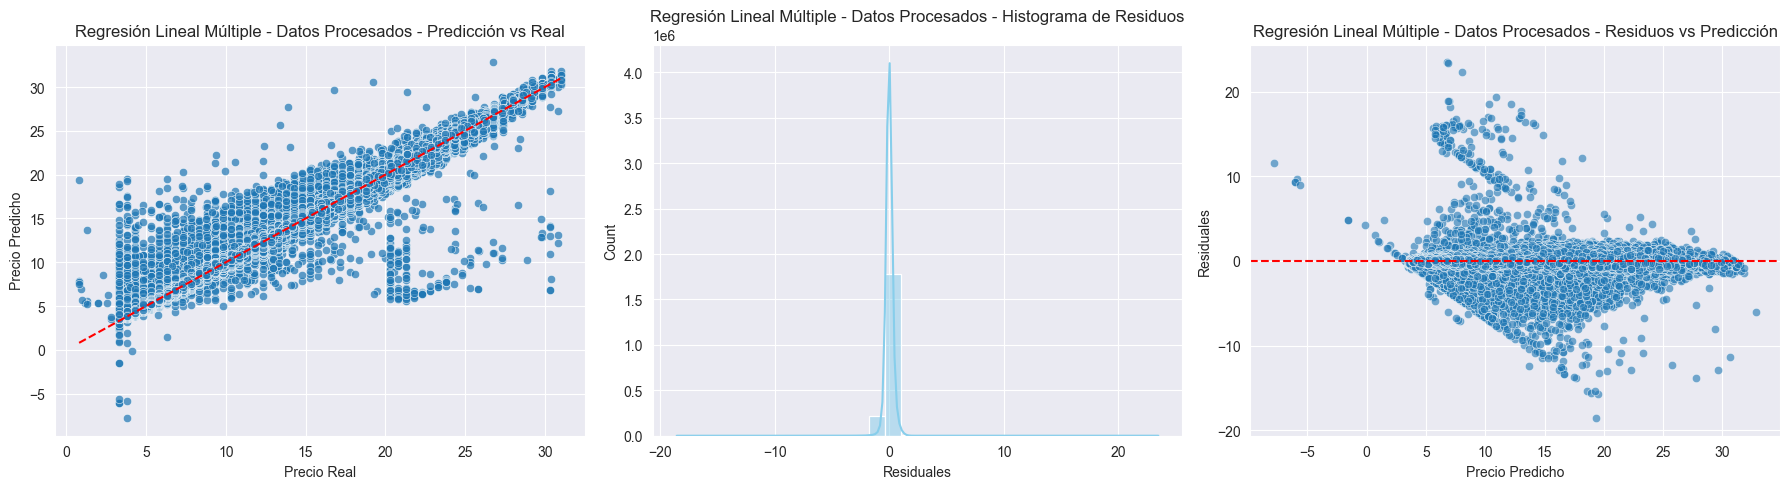

C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2015993.
  res = hypotest_fun_out(*samples, **kwds)


Regresión Lineal Múltiple - Datos Procesados → Shapiro-Wilk: estadístico=0.7866, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.

📊 Análisis de residuos para modelo: Lasso


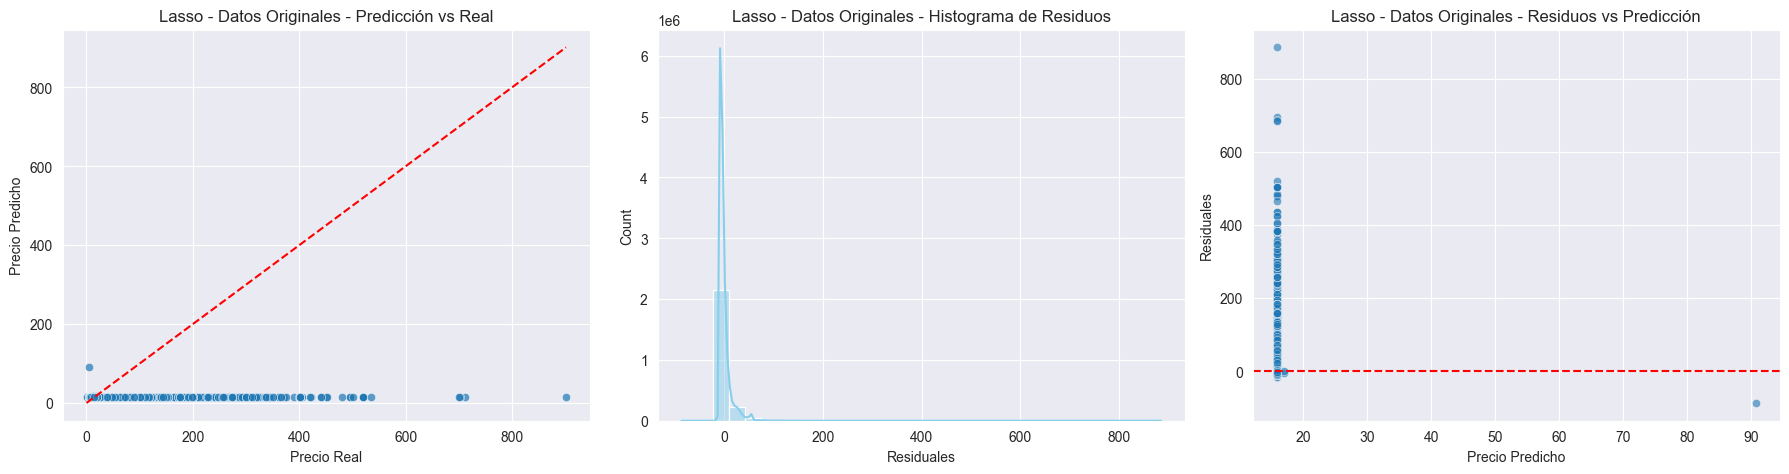

C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2431475.
  res = hypotest_fun_out(*samples, **kwds)


Lasso - Datos Originales → Shapiro-Wilk: estadístico=0.6579, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


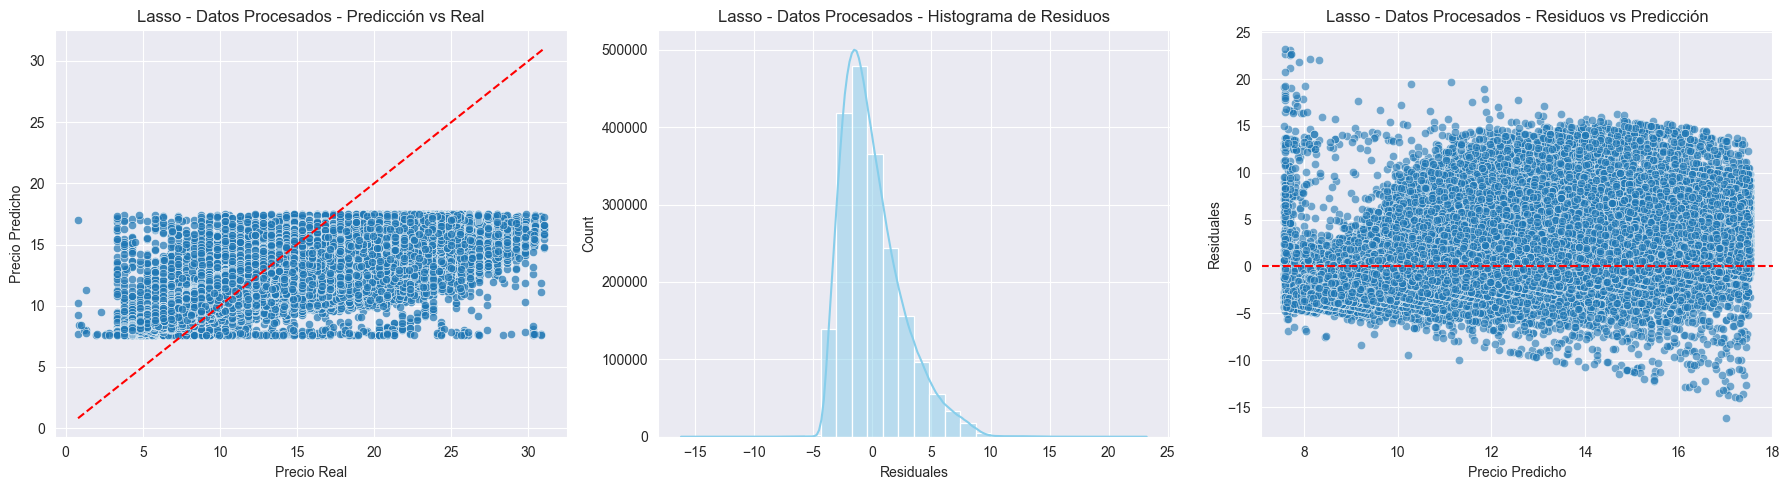

C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2015993.
  res = hypotest_fun_out(*samples, **kwds)


Lasso - Datos Procesados → Shapiro-Wilk: estadístico=0.9369, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


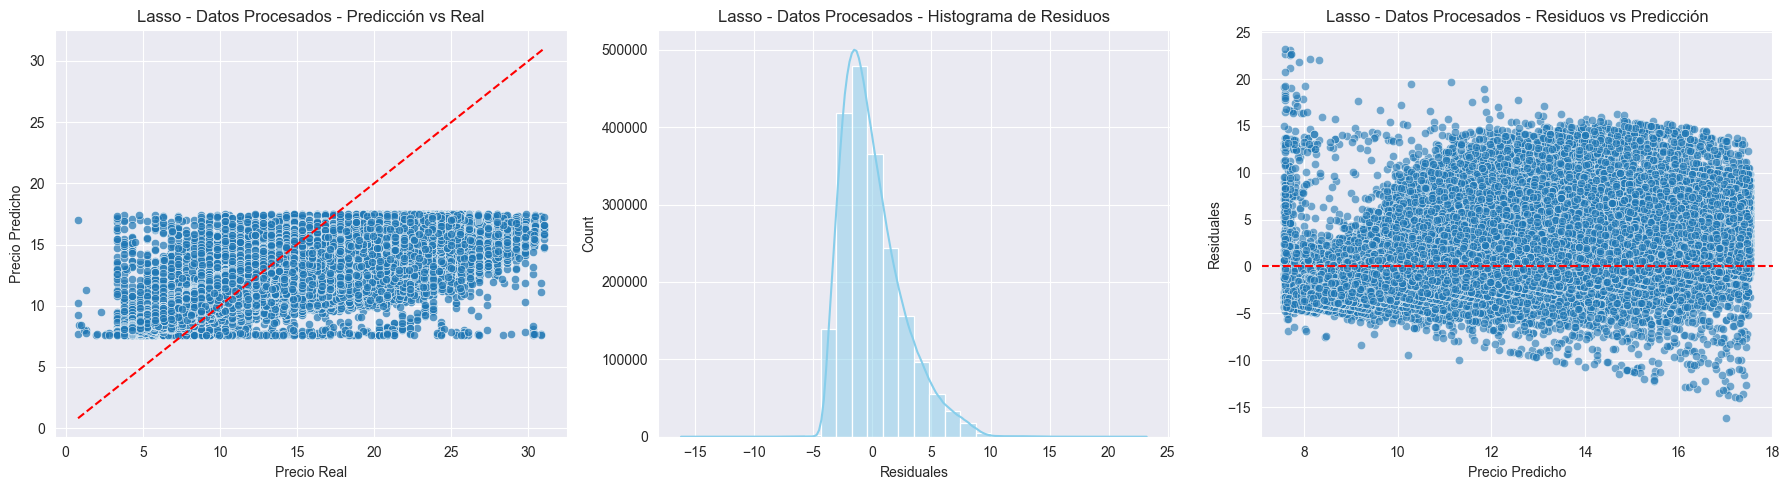

C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2015993.
  res = hypotest_fun_out(*samples, **kwds)


Lasso - Datos Procesados → Shapiro-Wilk: estadístico=0.9369, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.

📊 Análisis de residuos para modelo: Ridge


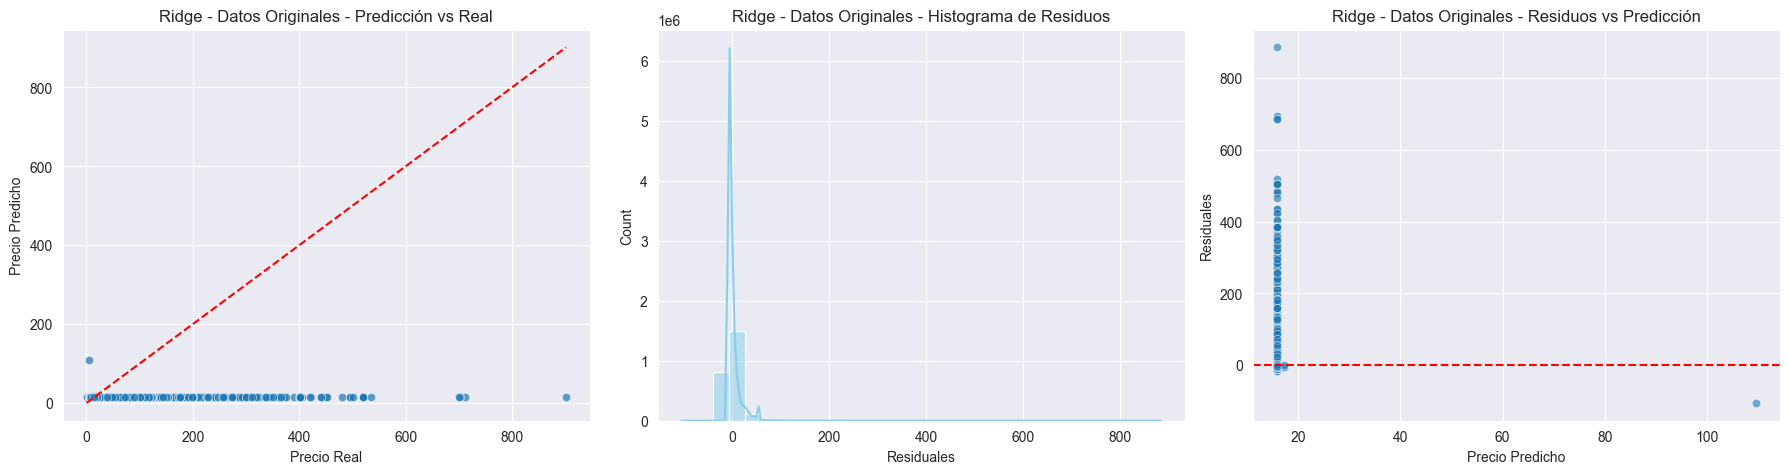

C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2431475.
  res = hypotest_fun_out(*samples, **kwds)


Ridge - Datos Originales → Shapiro-Wilk: estadístico=0.6579, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


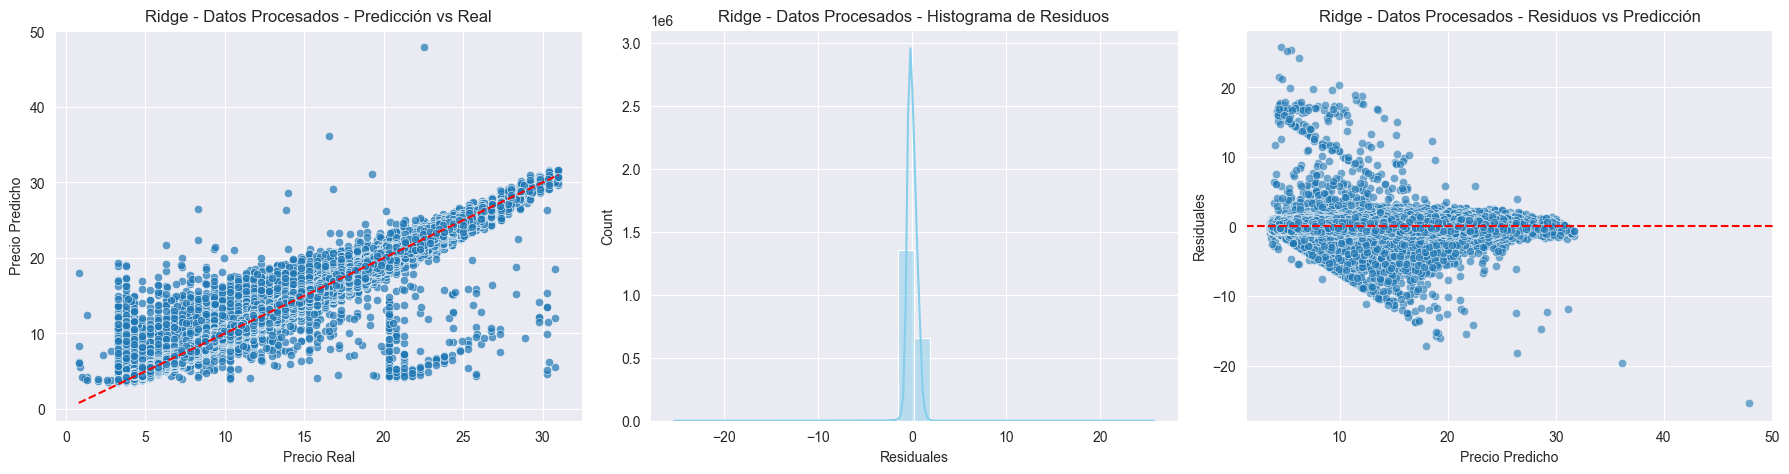

C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2015993.
  res = hypotest_fun_out(*samples, **kwds)


Ridge - Datos Procesados → Shapiro-Wilk: estadístico=0.8872, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


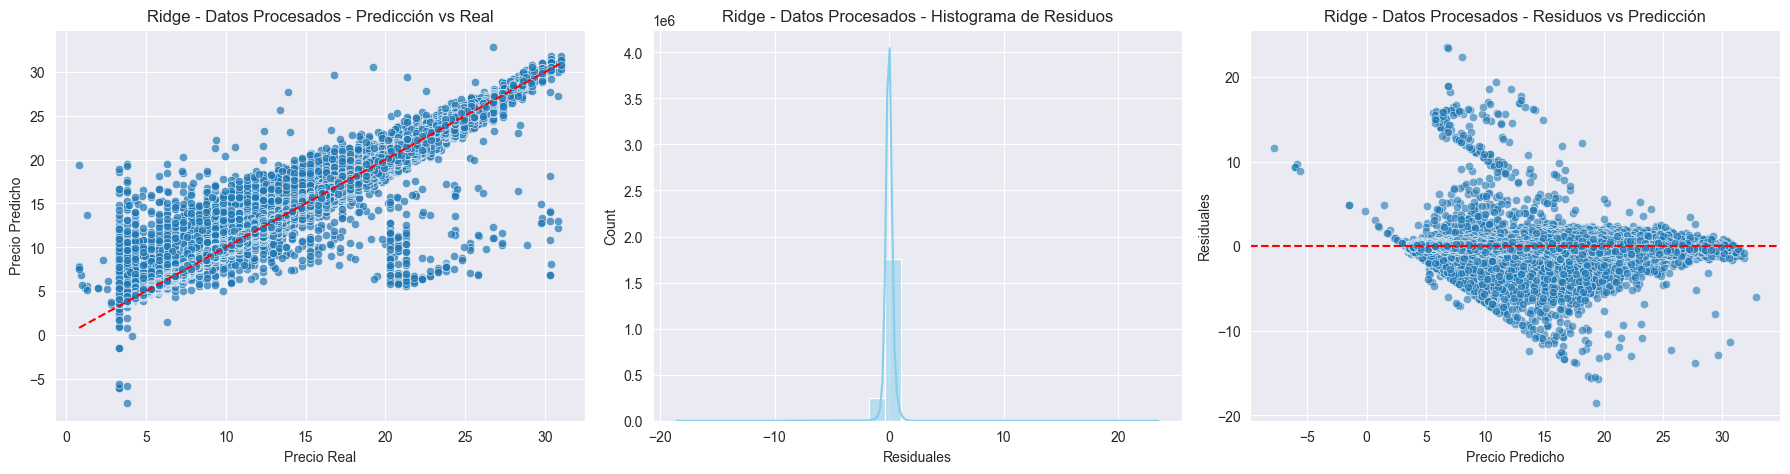

Ridge - Datos Procesados → Shapiro-Wilk: estadístico=0.7864, p-valor=0.0000
→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.


C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2015993.
  res = hypotest_fun_out(*samples, **kwds)


In [428]:
from scipy.stats import shapiro

for name, outputs in model_outputs.items():
    print(f"\n📊 Análisis de residuos para modelo: {name}")

    for idx, (key, (y_true, y_pred, residuals, title)) in enumerate(outputs.items()):
        # Plot Predicted vs Actual
        plt.figure(figsize=(18, 5))
        plt.subplot(1, 3, 1)
        sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color='red')
        plt.xlabel("Precio Real")
        plt.ylabel("Precio Predicho")
        plt.title(f"{title} - Predicción vs Real")

        # Histogram of Residuals
        plt.subplot(1, 3, 2)
        sns.histplot(residuals, kde=True, bins=30, color='skyblue')
        plt.title(f"{title} - Histograma de Residuos")
        plt.xlabel("Residuales")

        # Residuals vs Predicted
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.title(f"{title} - Residuos vs Predicción")
        plt.xlabel("Precio Predicho")
        plt.ylabel("Residuales")

        plt.tight_layout()
        plt.show()

        # Normality test (Shapiro-Wilk)
        stat, p = shapiro(residuals)
        print(f"{title} → Shapiro-Wilk: estadístico={stat:.4f}, p-valor={p:.4f}")
        if p > 0.05:
            print("→ ✅ No se rechaza H₀: los residuos parecen seguir una distribución normal.")
        else:
            print("→ ❌ Se rechaza H₀: los residuos no siguen una distribución normal.")


##### Paso 12.1.3.3: Gráficas de residuos Q&Q


Entrenando modelo: Regresión Lineal Múltiple


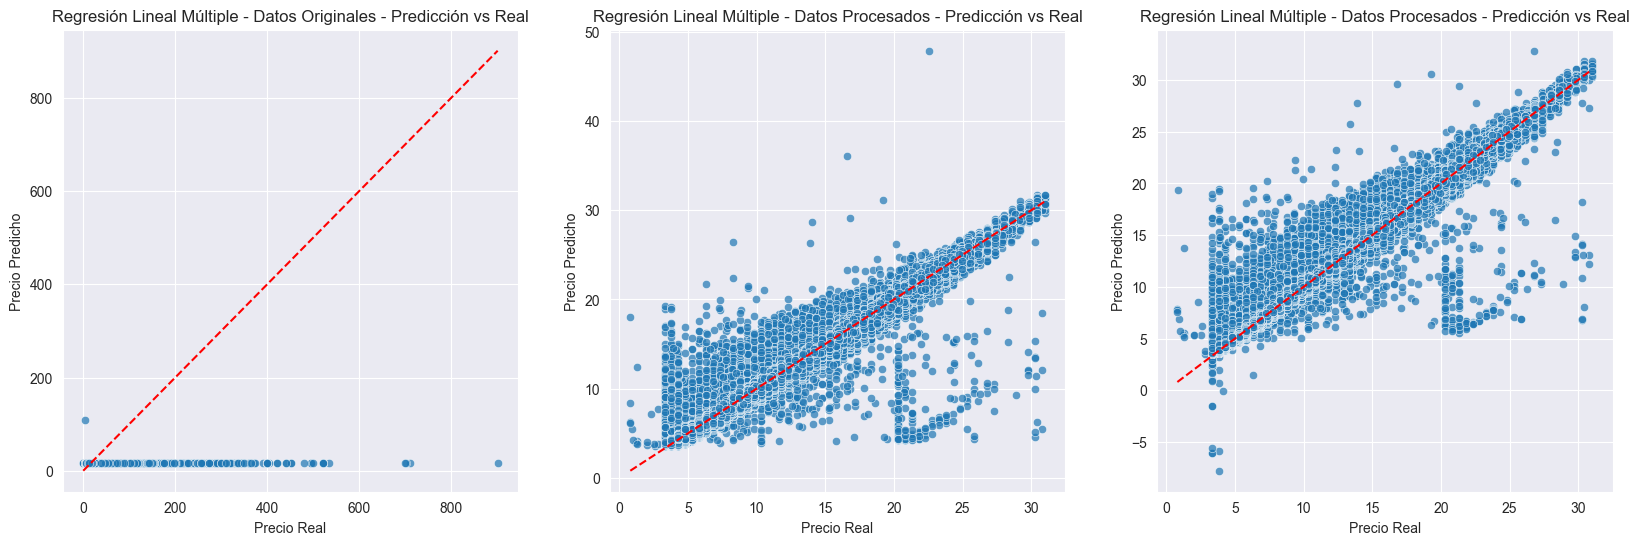


Entrenando modelo: Lasso
Mejores hiperparámetros para Lasso: {'alpha': 10}


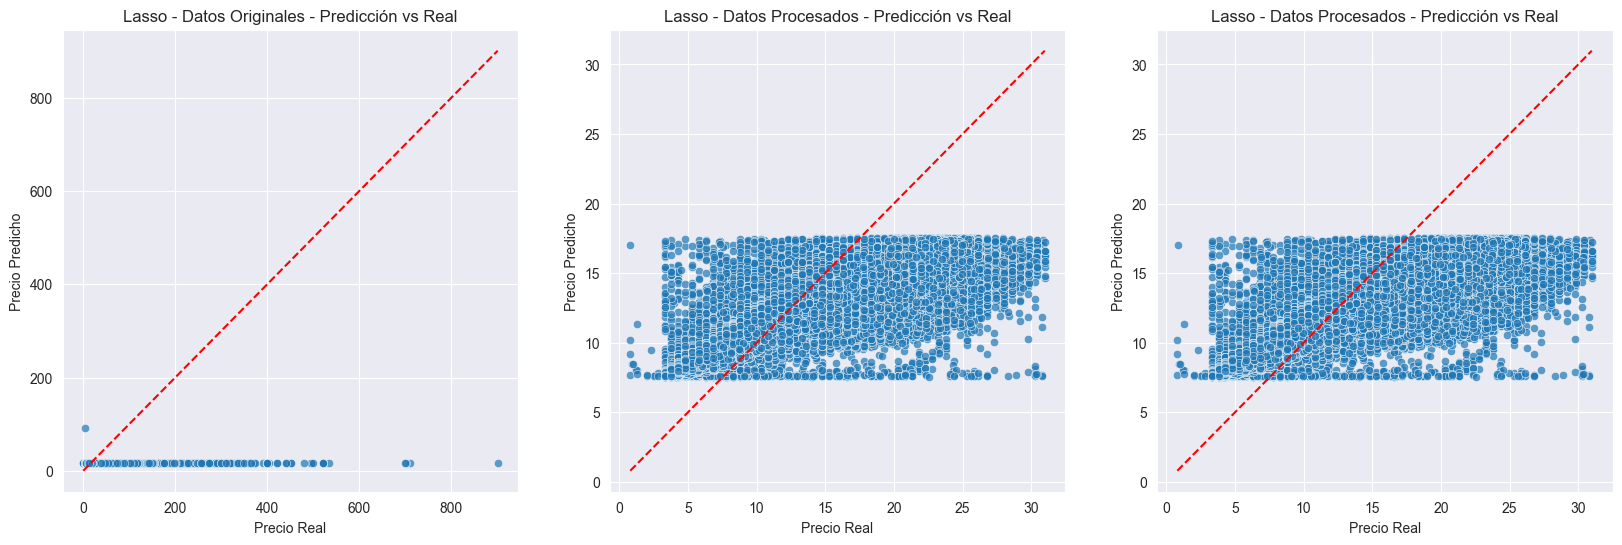


Entrenando modelo: Ridge
Mejores hiperparámetros para Ridge: {'alpha': 1000}


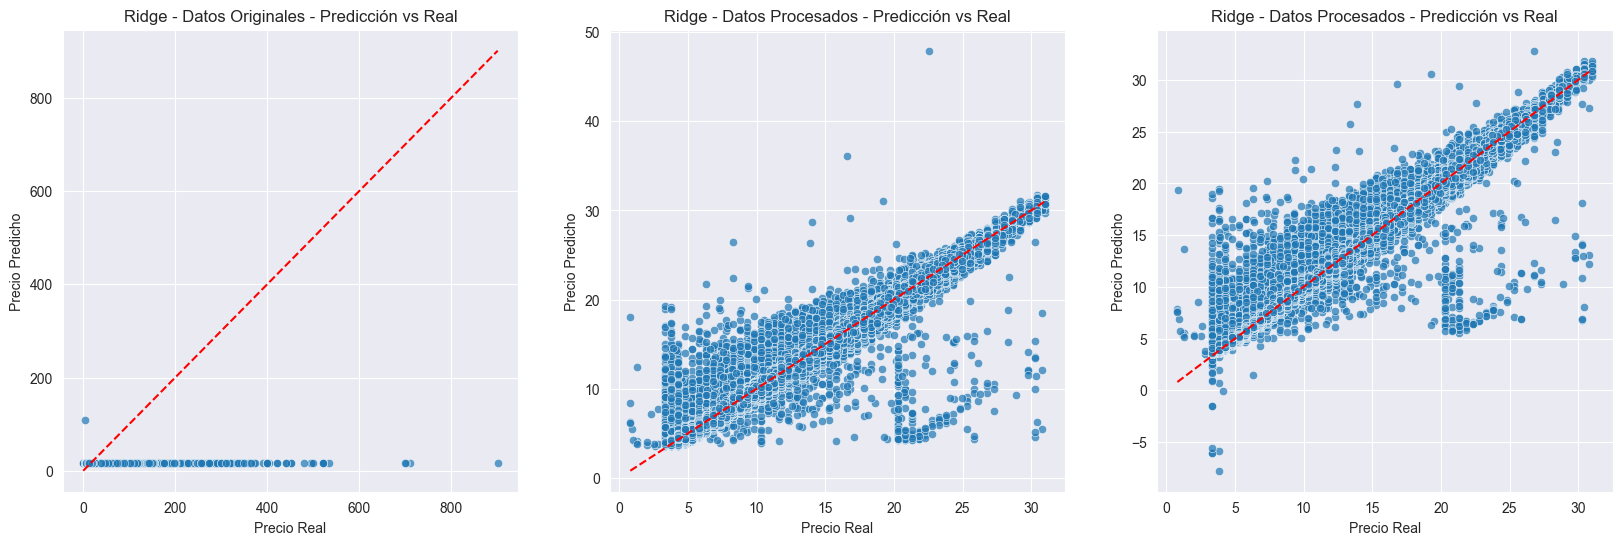

In [429]:
for name, model in base_models.items():
    print(f"\nEntrenando modelo: {name}")

    use_grid_search = True

    # Hyperparameter tuning only if allowed
    if use_grid_search and name in param_grid:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            grid = GridSearchCV(model, param_grid[name], cv=5, scoring='r2', error_score='raise')
            grid.fit(X_train, y_train)
            model = grid.best_estimator_
            print(f"Mejores hiperparámetros para {name}: {grid.best_params_}")

    # Train and evaluate on original data
    y_train_pred, y_pred_test, title, metrics1 = train_and_evaluate_model(
        model, X_train, X_test, y_train, y_test, f"{name} - Datos Originales")
    results.append({"Modelo": name + " - Original", **metrics1})

    # Plot 1
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel("Precio Real")
    plt.ylabel("Precio Predicho")
    plt.title(f"{title} - Predicción vs Real")

    # Train and evaluate on cleaned 3-variable data
    y_train_pred_cleaned, y_pred_test_cleaned, title_cleaned, metrics2_cleaned = train_and_evaluate_model(
        model, X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned, f"{name} - Datos Procesados")
    results.append({"Modelo": name + " - Procesado 3 Variables", **metrics2_cleaned})

    plt.subplot(1, 3, 2)
    sns.scatterplot(x=y_test_cleaned, y=y_pred_test_cleaned, alpha=0.7)
    plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], [y_test_cleaned.min(), y_test_cleaned.max()], '--', color='red')
    plt.xlabel("Precio Real")
    plt.ylabel("Precio Predicho")
    plt.title(f"{title_cleaned} - Predicción vs Real")

    # Train and evaluate on cleaned full dataset
    y_train_pred_complete, y_pred_test_cleaned_complete, title_cleaned_complete, metrics2_cleaned_complete = train_and_evaluate_model(
        model, X_train_cleaned_complete, X_test_cleaned_complete, y_train_cleaned_complete, y_test_cleaned_complete, f"{name} - Datos Procesados")
    results.append({"Modelo": name + " - Procesado Completo", **metrics2_cleaned_complete})

    plt.subplot(1, 3, 3)
    sns.scatterplot(x=y_test_cleaned_complete, y=y_pred_test_cleaned_complete, alpha=0.7)
    plt.plot([y_test_cleaned_complete.min(), y_test_cleaned_complete.max()], [y_test_cleaned_complete.min(), y_test_cleaned_complete.max()], '--', color='red')
    plt.xlabel("Precio Real")
    plt.ylabel("Precio Predicho")
    plt.title(f"{title_cleaned_complete} - Predicción vs Real")
    plt.show()

##### Paso 12.1.3.4: Prueba de Varianza Constante

##### Paso 12.1.3.5: Prueba de Independencia

### Paso 12.1.4: Evaluación

In [430]:
results_df = pd.DataFrame(results)
results_df

Modelo  MAE_Train  RMSE_Train  \
0                Regresión Lineal Múltiple - Original   8.174677   13.138770   
1   Regresión Lineal Múltiple - Procesado 3 Variables   0.391742    0.530635   
2      Regresión Lineal Múltiple - Procesado Completo   0.243068    0.381870   
3                                    Lasso - Original   8.174680   13.138771   
4                       Lasso - Procesado 3 Variables   2.024734    2.580051   
5                          Lasso - Procesado Completo   2.024734    2.580051   
6                                    Ridge - Original   8.174677   13.138770   
7                       Ridge - Procesado 3 Variables   0.391754    0.530636   
8                          Ridge - Procesado Completo   0.243047    0.381878   
9                Regresión Lineal Múltiple - Original   8.174677   13.138770   
10  Regresión Lineal Múltiple - Procesado 3 Variables   0.391742    0.530635   
11     Regresión Lineal Múltiple - Procesado Completo   0.243068    0.381870   
12                                   Lasso - Original   8.174680   13.138771   
13                      Lasso - Procesado 3 Variables   2.024734    2.580051   
14                         Lasso - Procesado Completo   2.024734    2.580051   
15                                   Ridge - Original   8.174677   13.138770   
16                      Ridge - Procesado 3 Variables   0.391754    0.530636   
17                         Ridge - Procesado Completo   0.243047    0.381878   

    R2_Train  MAE_Test  RMSE_Test   R2_Test  
0   0.000001  8.177330  13.106597 -0.000024  
1   0.984737  0.391458   0.528589  0.984853  
2   0.992096  0.242991   0.377519  0.992274  
3   0.000001  8.177325  13.106544 -0.000016  
4   0.639176  2.024494   2.579779  0.639205  
5   0.639176  2.024494   2.579779  0.639205  
6   0.000001  8.177330  13.106597 -0.000024  
7   0.984737  0.391471   0.528589  0.984853  
8   0.992095  0.242971   0.377573  0.992271  
9   0.000001  8.177330  13.106597 -0.000024  
10  0.984737  0.391458   0.528589  0.984853  
11  0.992096  0.242991   0.377519  0.992274  
12  0.000001  8.177325  13.106544 -0.000016  
13  0.639176  2.024494   2.579779  0.639205  
14  0.639176  2.024494   2.579779  0.639205  
15  0.000001  8.177330  13.106597 -0.000024  
16  0.984737  0.391471   0.528589  0.984853  
17  0.992095  0.242971   0.377573  0.992271